In [1]:
import sys
sys.path.insert(1, '/home/richard/nfmc_jax/')
import nfmc_jax
import arviz as az
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
from sklearn.neighbors import KernelDensity
import jax
import jax.numpy as jnp
from jax.scipy.special import logsumexp
from jax.scipy.stats import multivariate_normal as mvn
import chaospy
import corner
import torch
import warnings

import getdist
from getdist import plots, MCSamples

seed=1234
np.random.seed(seed)
key = jax.random.PRNGKey(seed)

# 1d Gaussian likelihood and prior test for nfmc_jax

In [2]:
n = 10

def log_like(x, mu=jnp.zeros(n), cov=jnp.eye(n)):
    return mvn.logpdf(x, mu, cov)

def log_prior(x, mu=jnp.zeros(n), cov=jnp.eye(n) * 25):
    return mvn.logpdf(x, mu, cov)

key = jax.random.PRNGKey(100)
prior_samples = jax.random.multivariate_normal(key, mean=jnp.zeros(n), 
                                               cov=jnp.eye(n) * 25, shape=(10*n,))
prior_samples.shape[1]

10

In [13]:
n = 10

trace = nfmc_jax.infer_nfomc(log_like, log_prior, prior_samples, 
                             log_like_args=(), 
                             log_prior_args=(), 
                             vmap=True, 
                             parallel_backend=None, 
                             n0=10*n,
                             N=10*n,
                             iteration=5, 
                             N_AF=2*10*n,
                             rel_bw=1,
                             rel_beta=0.5,
                             frac_rel_beta_AF=1,
                             alpha_w=(0,0),
                             alpha_uw=(0,0),
                             use_latent_beta2=False,
                             use_pq_beta_IW1=False,
                             expl_top_AF=n, 
                             expl_latent=n, 
                             expl_top_qw=n, 
                             local_thresh=3,
                             nfmc_draws=100, 
                             nf_iter=100, 
                             k_trunc=jnp.inf, 
                             ess_tol=1.0, 
                             eps_z=0.05,
                             inference_mode="sampling", 
                             cull_lowp_tol=0.01, 
                             max_cull_frac=0.1,
                             trainable_qw=False, 
                             beta_max=1, 
                             bw_factor_min=1, 
                             bw_factor_max=1, 
                             bw_factor_num=1,
                             latent_sigma=(2.4/2**2)/np.sqrt(10),
                             N_temp=1000,
                             t_ess=0.5,
                             NBfirstlayer=True,
                             interp_nbin=None,
                             sgd_steps=0,
                             knots_trainable=5,
                             frac_validate=0.0)

Inference mode is sampling. Maximum beta is set to 1.
logIW3 [-2.332695   -3.486929   -1.8575478  -4.2010975  -1.2648029   0.45399094
 -1.1253128  -2.8027878  -2.7999535  -1.9476662  -1.0089455  -1.1863804
  0.8937416  -1.9293518  -1.4927864  -1.8747826   0.21546364 -0.9571247
 -0.39774323 -0.76867104 -1.9691868  -2.3310165  -3.9805813  -0.9288292
 -1.1980724  -1.3414803  -0.27119637 -0.87405396  0.894577   -1.7821045
 -1.024456   -2.7801418  -0.8015213  -0.12659836 -2.3045177  -4.0782204
 -2.1089535  -3.3344498  -0.01739693 -0.7162609  -2.0991936  -0.9564247
 -0.5130234  -2.0730095  -1.971735   -2.3749256  -0.2318306  -1.3823318
 -0.08140755 -2.1422138   0.13214111 -2.1340523  -1.3750038  -1.262001
 -1.5183392  -0.7607708  -0.92131996 -1.2257423  -0.60739136 -3.232029
 -1.7096863  -0.54532623  0.04787827 -0.14012146  0.27829552 -3.7936115
 -2.4133472  -1.3802185   0.16170883 -1.5835018  -1.105442   -1.7743759
 -2.8257656   0.49664307 -0.7093563  -5.663433   -2.2031517  -1.6912899
 -0.

jnp.shape(nfomc.posterior_logp) = (150,)
jnp.shape(jnp.atleast_1d(posterior_logp_new)) = (30,)
logIW3 [-3.013567   -3.3043709  -1.7992077  -7.0040283  -1.2261276  -3.442503
 -3.4166794  -4.730736   -6.5046577  -4.166378   -2.0650597  -3.0153923
 -1.5604496  -3.1401405  -3.5397968  -1.8785286  -1.3242855  -3.0308418
 -2.7071857  -2.4639874  -2.598545   -6.7798615  -3.6253128  -1.9542179
 -1.9634304  -1.5728474  -0.7527027  -1.8450851  -2.801733   -3.6871872
 -1.2597523  -2.8314972  -1.9124451  -1.421978   -5.769264   -4.613674
 -3.2980862  -4.516205   -1.1546116  -3.059641   -4.9108696  -2.8886585
 -2.0044556  -2.9865665  -3.8785267  -2.3672676  -1.2182312  -2.2817745
 -2.6837044  -3.0915298  -4.050068   -4.7042274  -1.5922279  -1.5212936
 -2.3617992  -2.1694794  -2.4398022  -1.9950428  -2.2357445  -3.387127
 -2.641325   -3.7241611  -1.793644   -2.82201    -2.252287   -7.080385
 -6.3869133  -2.4712486  -1.6490269  -5.6273365  -0.8930626  -3.266714
 -4.666752   -1.4209137  -3.08675    -3

jnp.shape(nfomc.posterior_logp) = (240,)
jnp.shape(jnp.atleast_1d(posterior_logp_new)) = (30,)
logIW3 [-13.09761   -17.060284  -10.817186  -21.120598  -11.1231    -11.550941
 -11.409233  -12.451427  -22.852348  -17.405552   -5.4922676 -10.765961
  -8.402157  -13.607586   -8.920128  -13.079063   -6.001873   -9.897701
  -9.560745  -11.333313   -7.4723816 -22.529926  -11.460716   -6.0173454
  -4.7641315  -4.87599    -5.766243  -11.143366   -6.4042397 -11.948498
  -6.6900444 -10.910559  -10.038235   -5.469635  -18.659683  -14.656324
 -12.045887  -14.116463   -3.6731186  -4.8870373 -18.380196  -12.380995
  -6.8294296  -8.400768   -7.314949  -11.628704   -6.4311314  -6.90559
 -13.35902    -9.228119  -12.700293  -12.825531  -10.740852  -15.771618
  -9.133415  -11.723824   -9.916441   -7.4099216 -11.224068  -16.68628
  -9.308189  -10.238533   -6.500475   -9.823938   -5.2203236 -17.182693
 -20.679287   -9.478939   -5.5001144 -13.662373   -8.733555  -13.963974
 -12.772568   -7.2365513 -11.875774

jnp.shape(nfomc.posterior_logp) = (330,)
jnp.shape(jnp.atleast_1d(posterior_logp_new)) = (30,)
logIW3 [-28.6059    -33.233887  -24.516314  -49.82778   -25.338993  -28.910355
 -28.803051  -27.495659  -48.882477  -36.348328  -10.040413  -26.331017
 -17.014898  -29.126152  -24.017279  -30.0691    -14.112375  -23.784172
 -24.805126  -25.554865  -17.387316  -49.61048   -24.927914  -14.020039
 -10.21266    -9.563084  -10.394688  -24.815735  -13.827385  -30.729843
 -12.915401  -24.270407  -21.748608  -12.301092  -42.64216   -32.73654
 -30.686531  -35.368282  -12.590754   -9.962236  -42.106346  -28.664581
 -13.359863  -21.059841  -15.618526  -26.354664  -14.343481  -12.545906
 -25.461248  -17.549992  -29.877129  -25.882782  -24.690807  -36.587353
 -20.823368  -26.124527  -22.321157  -16.632053  -22.656345  -36.737976
 -20.058498  -25.686699  -14.5443535 -24.731007  -11.9183655 -36.437737
 -43.967937  -23.98809   -10.785101  -28.857618  -22.45454   -28.560669
 -29.872553  -17.628304  -31.164124

jnp.shape(nfomc.posterior_logp) = (390,)
jnp.shape(jnp.atleast_1d(posterior_logp_new)) = (30,)
logIW3 [ -45.04139    -56.054977   -38.944992   -79.104324   -38.55195
  -46.929188   -45.18409    -43.96617    -77.4715     -57.634853
  -16.335365   -43.62331    -27.624737   -46.465336   -39.402496
  -48.0453     -22.964306   -39.452835   -41.77334    -41.711452
  -27.146715   -79.97777    -42.526543   -25.102062   -16.825054
  -14.58511    -16.771702   -39.754196   -24.489489   -46.516884
  -21.036861   -40.22234    -33.630627   -19.18901    -67.56705
  -54.292717   -50.735588   -61.17776    -22.763783   -15.612782
  -67.30704    -44.505455   -23.665003   -33.353718   -25.056732
  -42.996155   -23.107012   -20.050602   -39.333607   -28.374262
  -46.86686    -44.07267    -46.946754   -61.593365   -30.544113
  -43.634243   -34.46682    -25.902363   -35.28917    -61.429726
  -28.702467   -45.304585   -22.726418   -39.718636   -17.120888
  -62.024666   -67.87565    -38.998775   -16.58765    -

/home/richard/nfmc_jax/nfmc_jax/nfomc/nfomc.py:257: RuntimeWarning: overflow encountered in exp
  inf_weights = jnp.isinf(np.exp(self.log_weight_pq))


jnp.shape(nfomc.posterior_logp) = (450,)
jnp.shape(jnp.atleast_1d(posterior_logp_new)) = (30,)
logIW3 [ -66.09052    -80.480484   -54.81996   -108.552246   -56.084694
  -68.13151    -62.430557   -61.465523  -108.189476   -86.42308
  -23.052147   -64.388725   -40.581276   -66.81939    -58.197224
  -71.851166   -30.91523    -56.977432   -61.027054   -61.377457
  -38.718487  -114.07903    -60.32351    -35.01153    -22.619747
  -20.107466   -22.14555    -57.908134   -33.95793    -68.688866
  -30.480114   -56.78752    -46.891315   -28.666178   -93.98056
  -75.00466    -72.305084   -86.061905   -30.211914   -22.236614
  -92.79352    -66.39624    -31.712574   -49.296326   -35.55436
  -64.09       -33.097725   -29.43544    -58.93628    -41.040764
  -63.781944   -60.591564   -67.40626    -84.53915    -47.57702
  -60.533813   -48.60114    -35.536163   -52.537582   -86.13939
  -41.130985   -63.881367   -31.723324   -55.47042    -24.734062
  -85.256454   -98.95718    -55.87612    -23.276691   -67.

jnp.shape(nfomc.posterior_logp) = (510,)
jnp.shape(jnp.atleast_1d(posterior_logp_new)) = (30,)
logIW3 [ -98.4874   -124.77281   -88.123405 -165.4665    -85.684006  -99.45121
  -96.95589   -96.13903  -166.91202  -131.29196   -34.498325  -97.99295
  -62.203026 -101.53459   -88.47191  -109.41243   -47.389324  -89.40724
  -93.94479   -94.51351   -60.896626 -178.6821    -91.65727   -54.202377
  -32.99328   -31.71306   -32.778835  -85.764175  -51.451447 -106.40567
  -45.800976  -87.21574   -74.32557   -41.444794 -142.34692  -115.29451
 -106.8694   -133.71011   -47.831604  -31.669086 -141.44923  -102.26499
  -47.493782  -74.71316   -52.99267   -93.11085   -49.028015  -42.641964
  -87.905815  -62.34458   -98.72337   -96.13815  -102.8419   -129.57918
  -72.92146   -95.297745  -71.63049   -51.942883  -80.0246   -127.2962
  -63.248787 -101.62935   -48.28033   -85.266106  -35.864105 -132.29852
 -149.26685   -85.118095  -35.15666  -102.3232    -78.17415  -104.86627
 -107.706535  -62.98667  -113.936

jnp.shape(nfomc.posterior_logp) = (570,)
jnp.shape(jnp.atleast_1d(posterior_logp_new)) = (30,)
logIW3 [-142.58102  -184.05829  -127.50041  -238.14465  -127.84206  -150.53848
 -145.10257  -142.00983  -246.61191  -192.71567   -49.81261  -142.37973
  -93.22273  -148.67279  -127.72365  -163.83765   -69.426674 -130.12671
 -139.86638  -135.67825   -92.27283  -256.67328  -137.43248   -78.91251
  -46.765804  -44.165222  -46.37887  -123.305176  -75.85577  -152.36803
  -68.86516  -128.58484  -108.204094  -62.00876  -209.7172   -163.93365
 -160.64037  -197.49838   -72.40474   -44.47454  -209.24554  -147.07611
  -68.35277  -115.68758   -78.088196 -137.37643   -71.22752   -63.986435
 -129.31773   -90.56361  -148.41226  -142.63036  -152.5187   -189.21414
 -103.25921  -140.84685  -106.935394  -74.65223  -120.95674  -189.49377
  -93.487076 -147.72125   -70.43667  -125.5659    -49.783867 -191.27701
 -219.70413  -124.55101   -50.00037  -150.57935  -114.49515  -153.7167
 -153.03201   -94.14855  -165.5067

Stage 3; Fitting weighted nf
beta_prod = 1.0
Stage 3; Update nfmc step
update_nfmc: Drawing samples from qw
update_nfmc: Evaluating logp values
update_nfmc: Calculating evidences.
update_nfmc: Local exploration
update_nfmc: Concatenating new samples
Stage 4; Fitting un-weighted nf
Stage 4; Fitting weighted nf
beta_prod = 1.0
Stage 4; Update nfmc step
update_nfmc: Drawing samples from qw
update_nfmc: Evaluating logp values
update_nfmc: Calculating evidences.
update_nfmc: Local exploration
update_nfmc: Concatenating new samples
Stage 5; Fitting un-weighted nf
Stage 5; Fitting weighted nf
beta_prod = 1.0
Stage 5; Update nfmc step
update_nfmc: Drawing samples from qw
update_nfmc: Evaluating logp values
update_nfmc: Calculating evidences.
update_nfmc: Local exploration
update_nfmc: Concatenating new samples
Stage 6; Fitting un-weighted nf
Stage 6; Fitting weighted nf
beta_prod = 1.0
Stage 6; Update nfmc step
update_nfmc: Drawing samples from qw
update_nfmc: Evaluating logp values
update_nfm

dict_keys(['q1_w', 'q1_uw', 'q2_w', 'q2_uw', 'q3_w', 'q3_uw', 'q4_w', 'q4_uw', 'q5_w', 'q5_uw', 'q6_w', 'q6_uw', 'q7_w', 'q7_uw', 'q8_w', 'q8_uw', 'q9_w', 'q9_uw', 'q10_w', 'q10_uw', 'q11_w', 'q11_uw', 'q12_w', 'q12_uw', 'q13_w', 'q13_uw', 'q14_w', 'q14_uw', 'q15_w', 'q15_uw', 'q16_w', 'q16_uw', 'q17_w', 'q17_uw', 'q18_w', 'q18_uw', 'q19_w', 'q19_uw', 'q_nfmc_1_w', 'q_nfmc_1_uw', 'q_nfmc_2_w', 'q_nfmc_2_uw', 'q_nfmc_3_w', 'q_nfmc_3_uw', 'q_nfmc_4_w', 'q_nfmc_4_uw', 'q_nfmc_5_w', 'q_nfmc_5_uw', 'q_nfmc_6_w', 'q_nfmc_6_uw', 'q_nfmc_7_w', 'q_nfmc_7_uw'])


<Figure size 432x288 with 0 Axes>

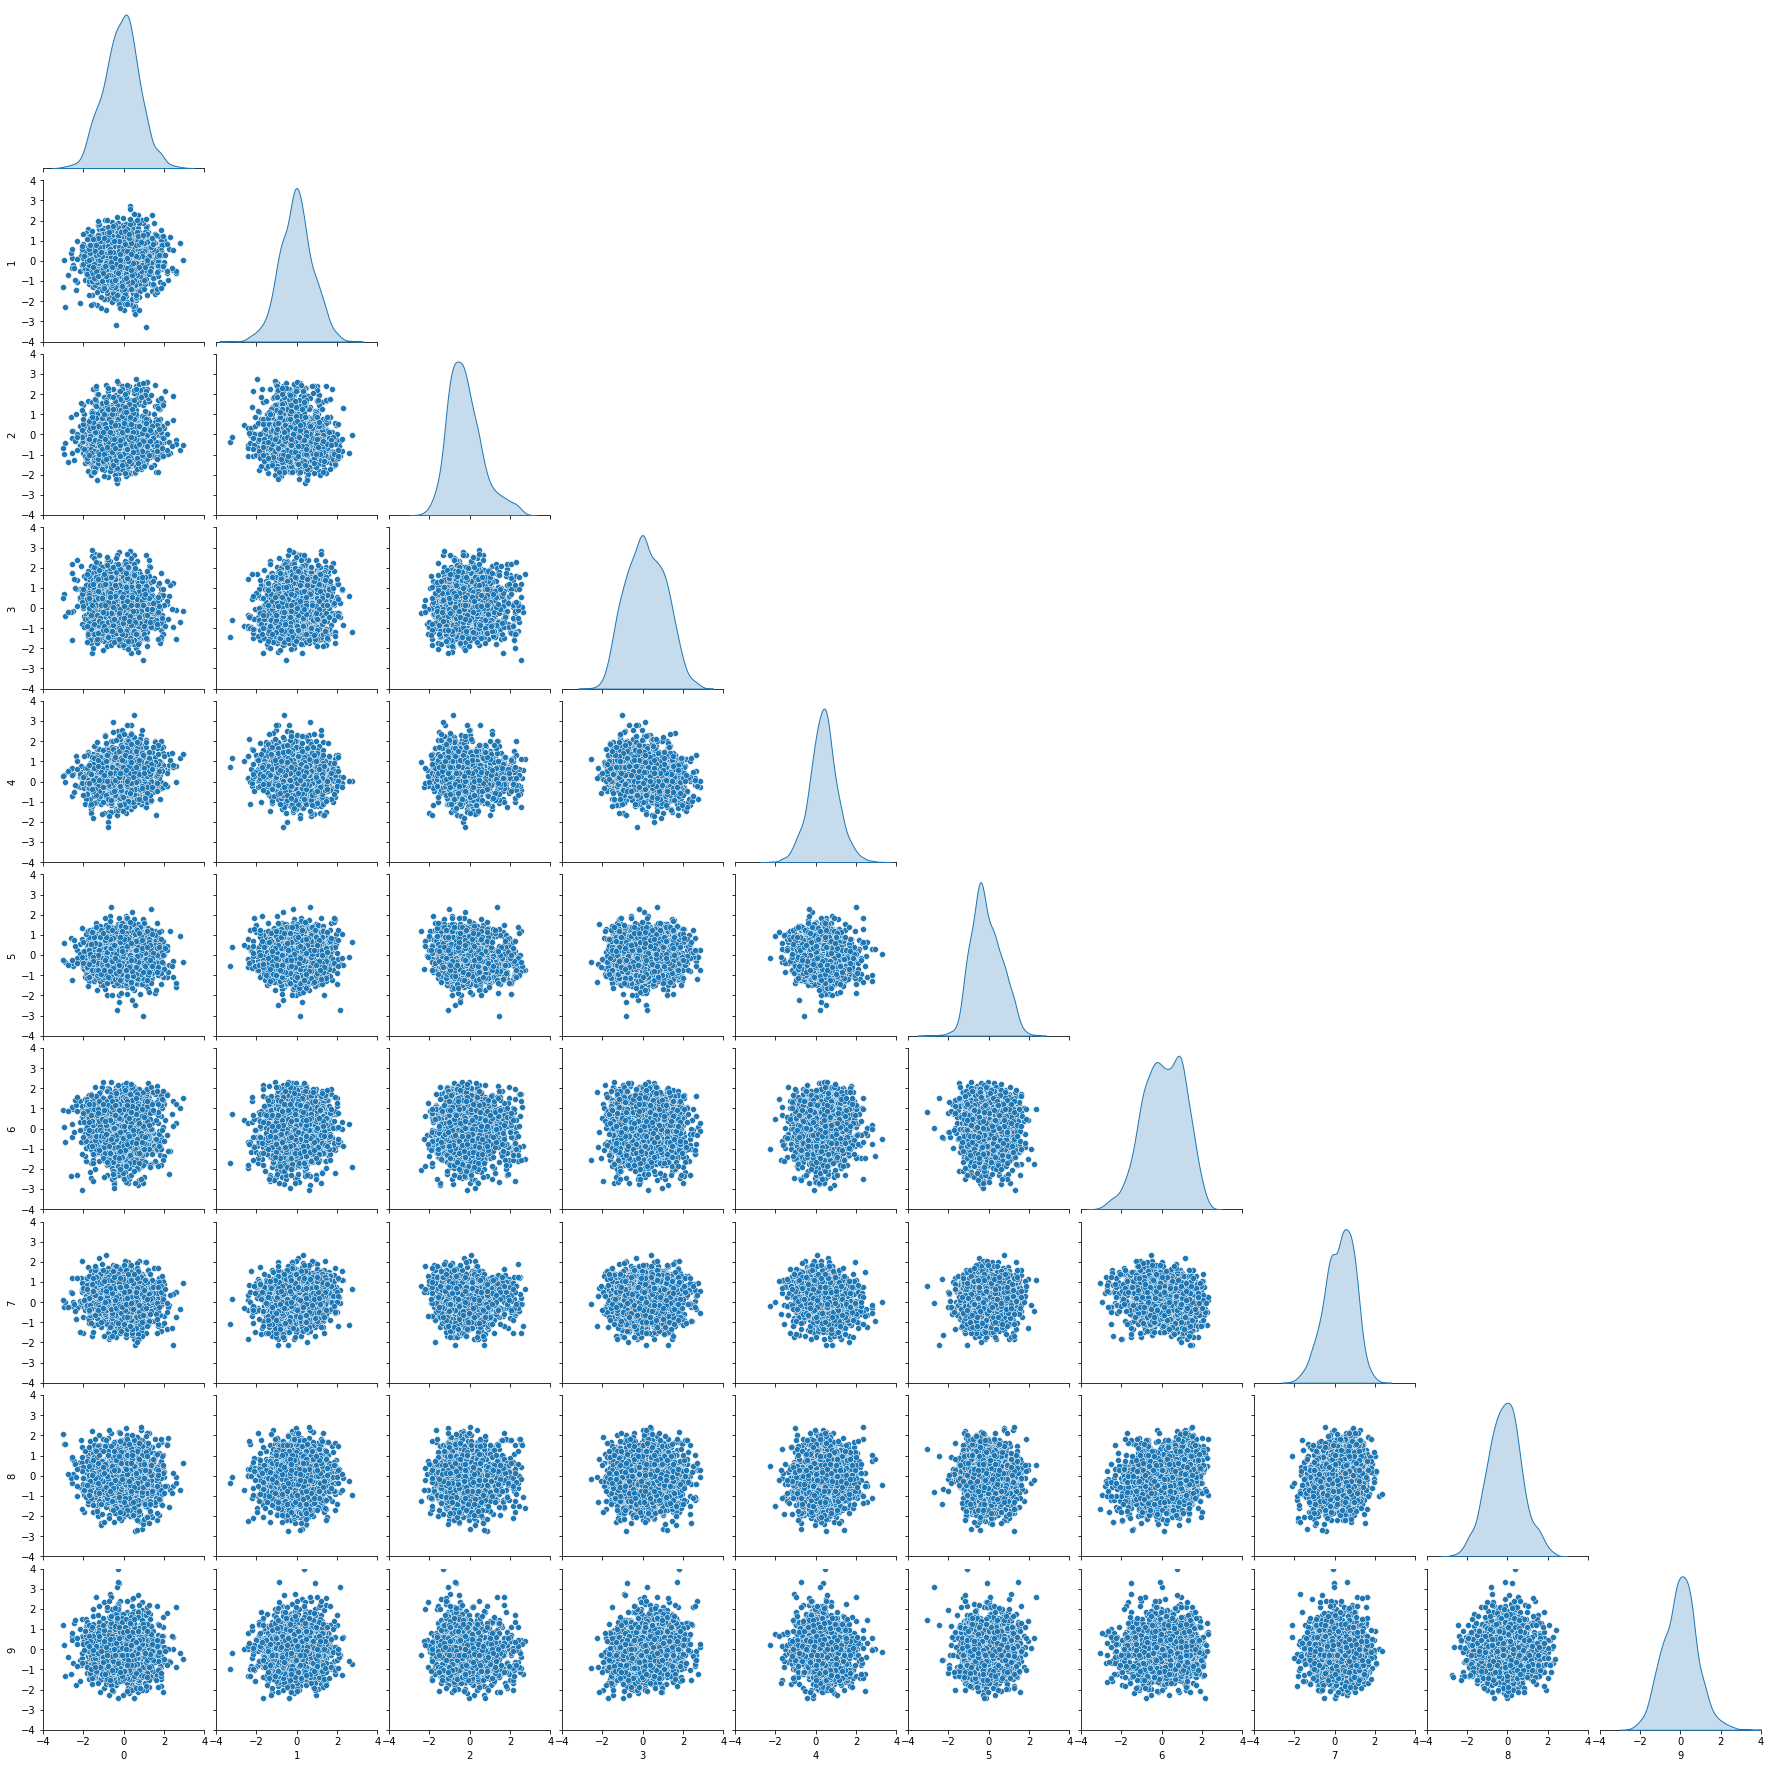

In [19]:
q_models = trace['q_models'][0]
print(q_models.keys())

qw = q_models['q19_w']
qw_samples = qw.sample(2000, device='cpu')[0].numpy()

keys = [f'x{i}' for i in range(10)]
samples = {}
for i, key in enumerate(keys):
    samples[key] = qw_samples[:, i]
    
plt.figure()
g = sns.pairplot(pd.DataFrame(qw_samples[:, :]), diag_kind='kde', corner=True)
g.set(xlim=(-4, 4), ylim=(-4, 4))
plt.savefig('qw_nfo_final_iter19.png')
plt.show()

<Figure size 432x288 with 0 Axes>

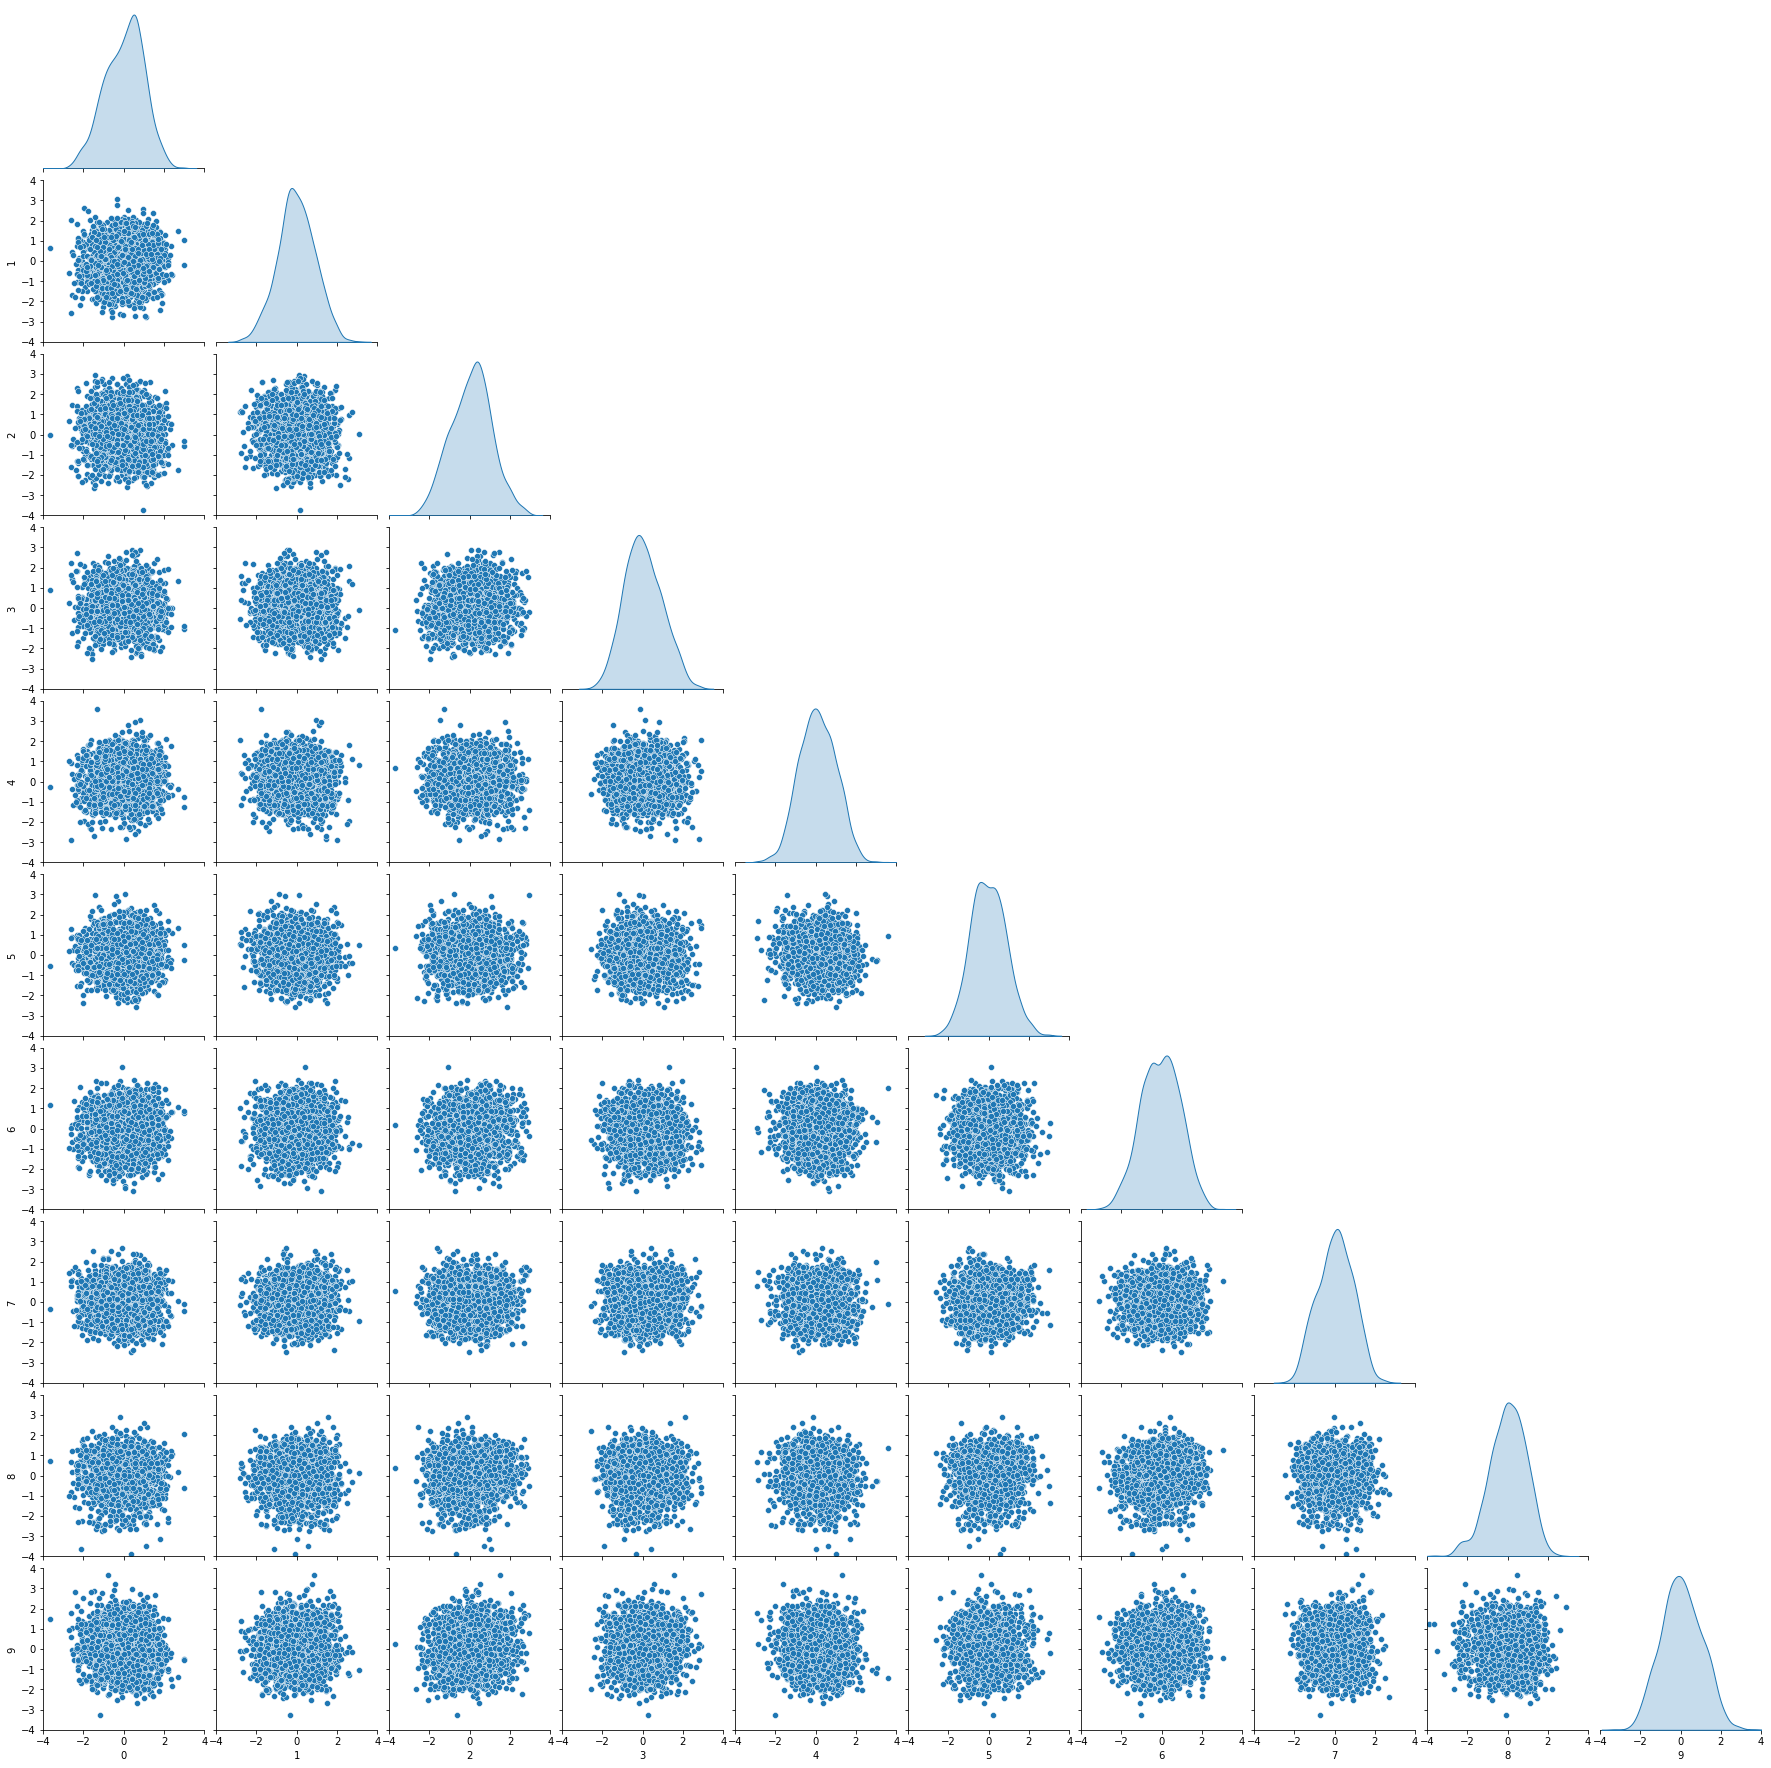

In [21]:
q_models = trace['q_models'][0]

qw = q_models['q_nfmc_7_w']
qw_samples = qw.sample(2000, device='cpu')[0].numpy()

keys = [f'x{i}' for i in range(10)]
samples = {}
for i, key in enumerate(keys):
    samples[key] = qw_samples[:, i]
    
plt.figure()
g = sns.pairplot(pd.DataFrame(qw_samples[:, :]), diag_kind='kde', corner=True)
g.set(xlim=(-4, 4), ylim=(-4, 4))
plt.savefig('qw_nfmc_final_iter7.png')
plt.show()

<Figure size 432x288 with 0 Axes>

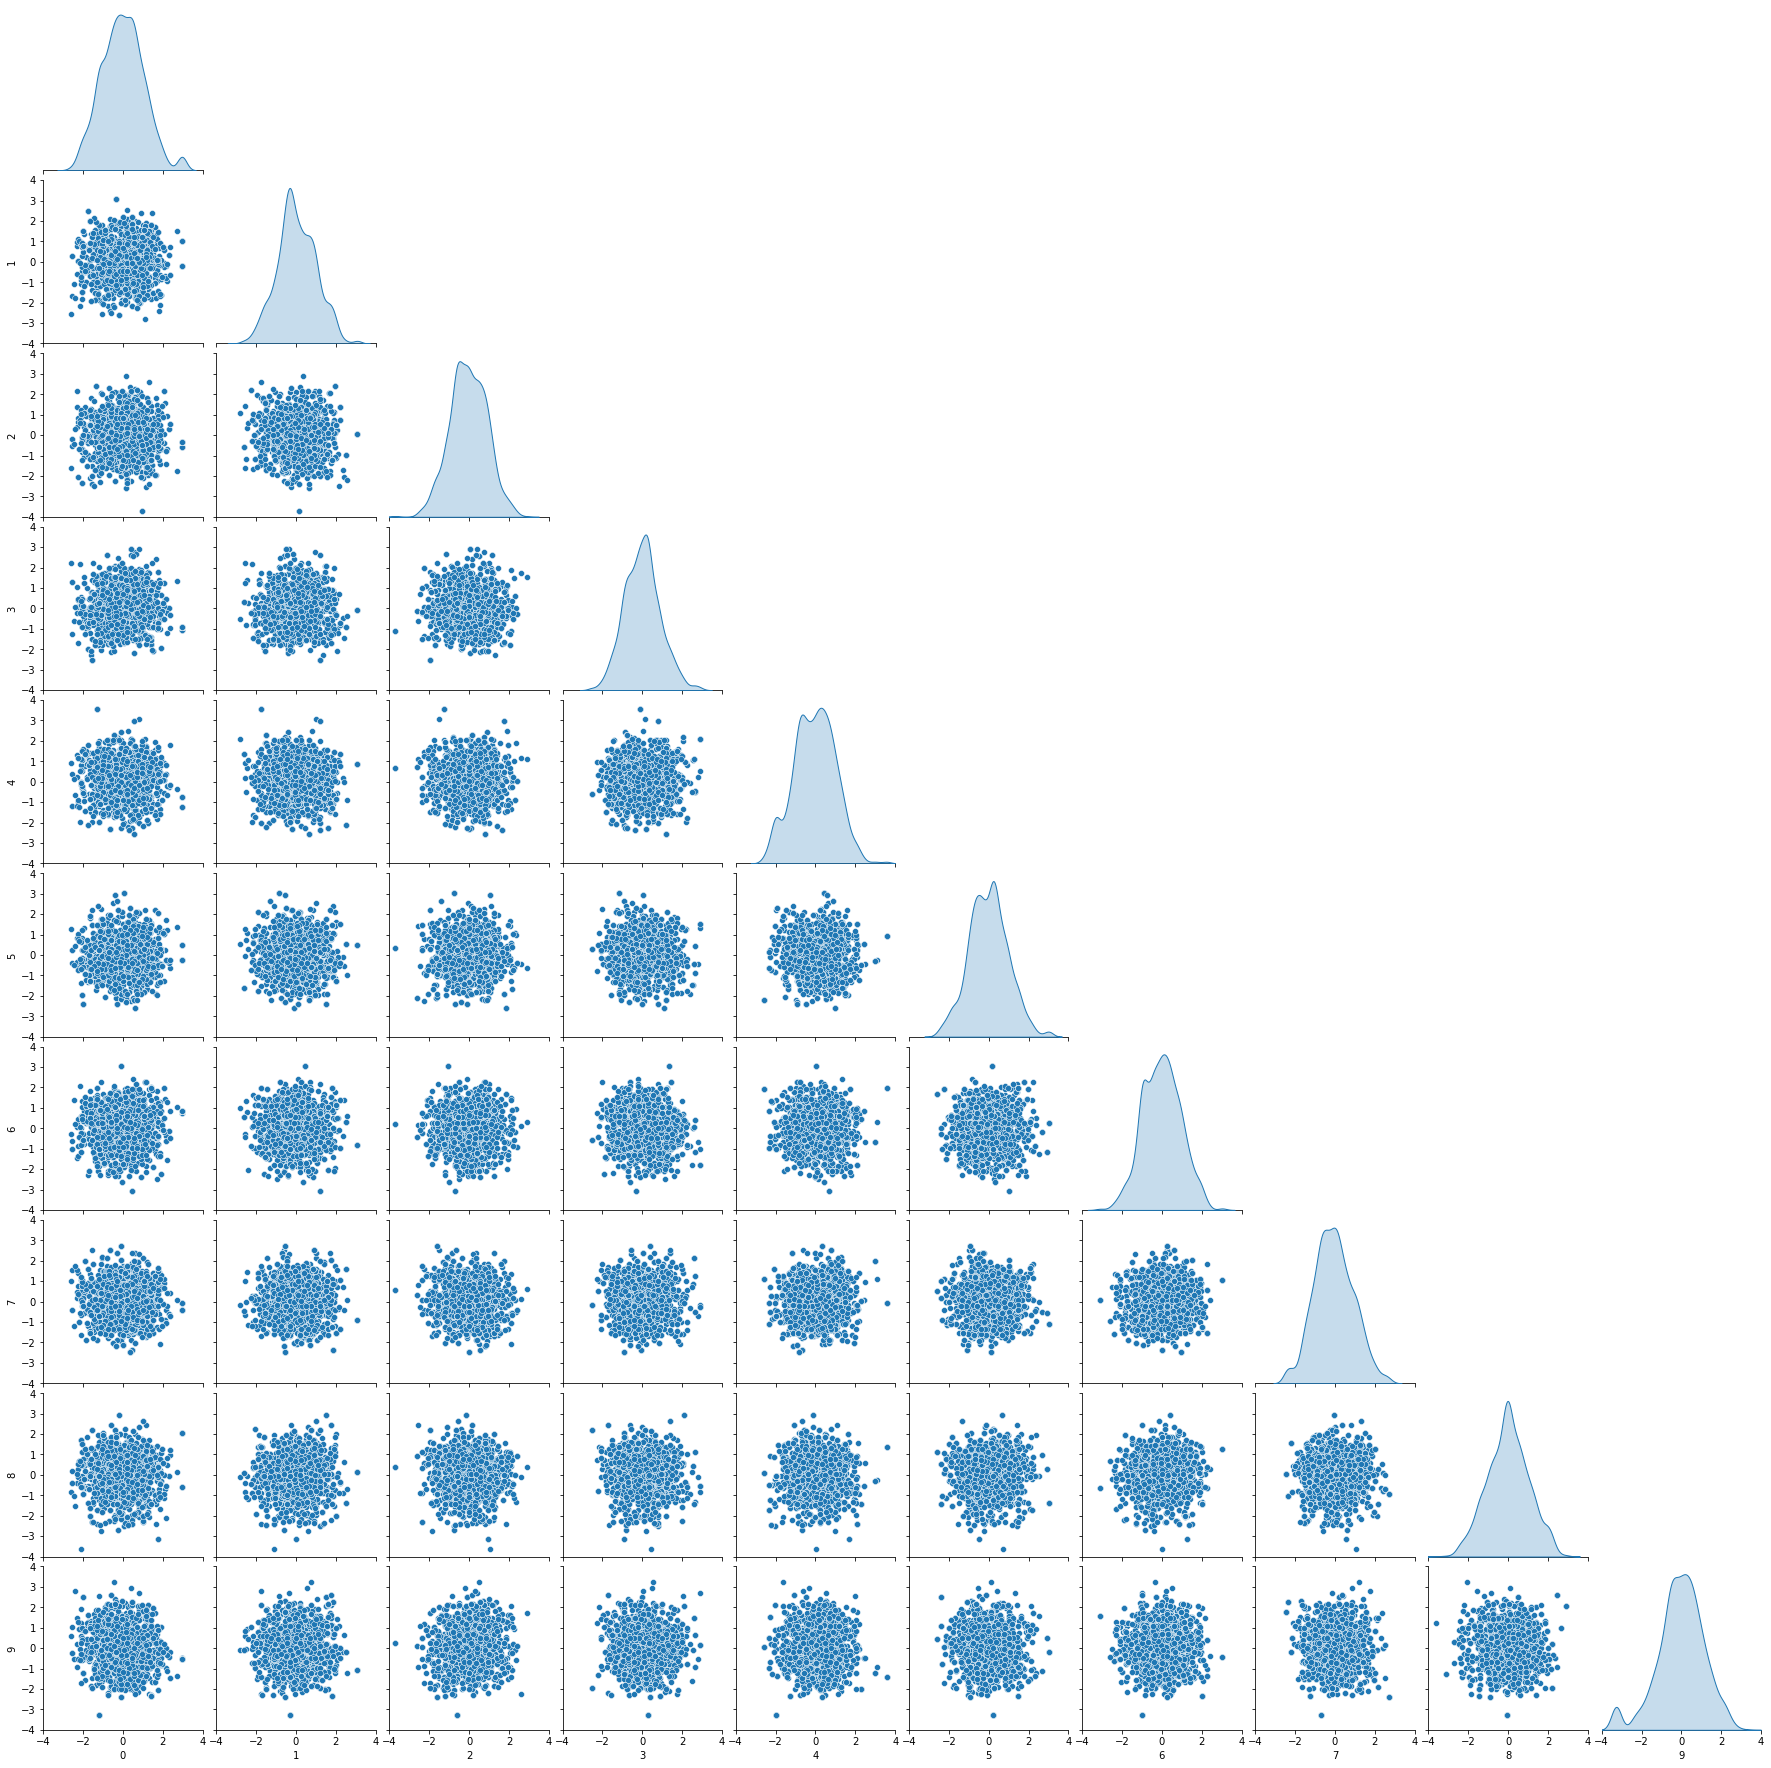

In [22]:
log_llk = jax.vmap(lambda x: log_like(x))(jnp.asarray(qw_samples))
log_pri = jax.vmap(lambda x: log_prior(x))(jnp.asarray(qw_samples))
log_joint = log_llk + log_pri

log_qw = qw.evaluate_density(torch.from_numpy(qw_samples)).numpy()

log_weight = log_joint - log_qw
log_weight -= logsumexp(log_weight)
weight = np.asarray(jnp.exp(log_weight)).astype(np.float64)
weight /= np.sum(weight)

resamp_idx = np.random.choice(np.arange(len(qw_samples)), size=len(qw_samples), p=weight)
posterior = qw_samples[resamp_idx, ...]

plt.figure()
g = sns.pairplot(pd.DataFrame(posterior[:, :]), diag_kind='kde', corner=True)
g.set(xlim=(-4, 4), ylim=(-4, 4))
plt.savefig('nfmc_weighted_posterior.png')
plt.show()

<Figure size 432x288 with 0 Axes>

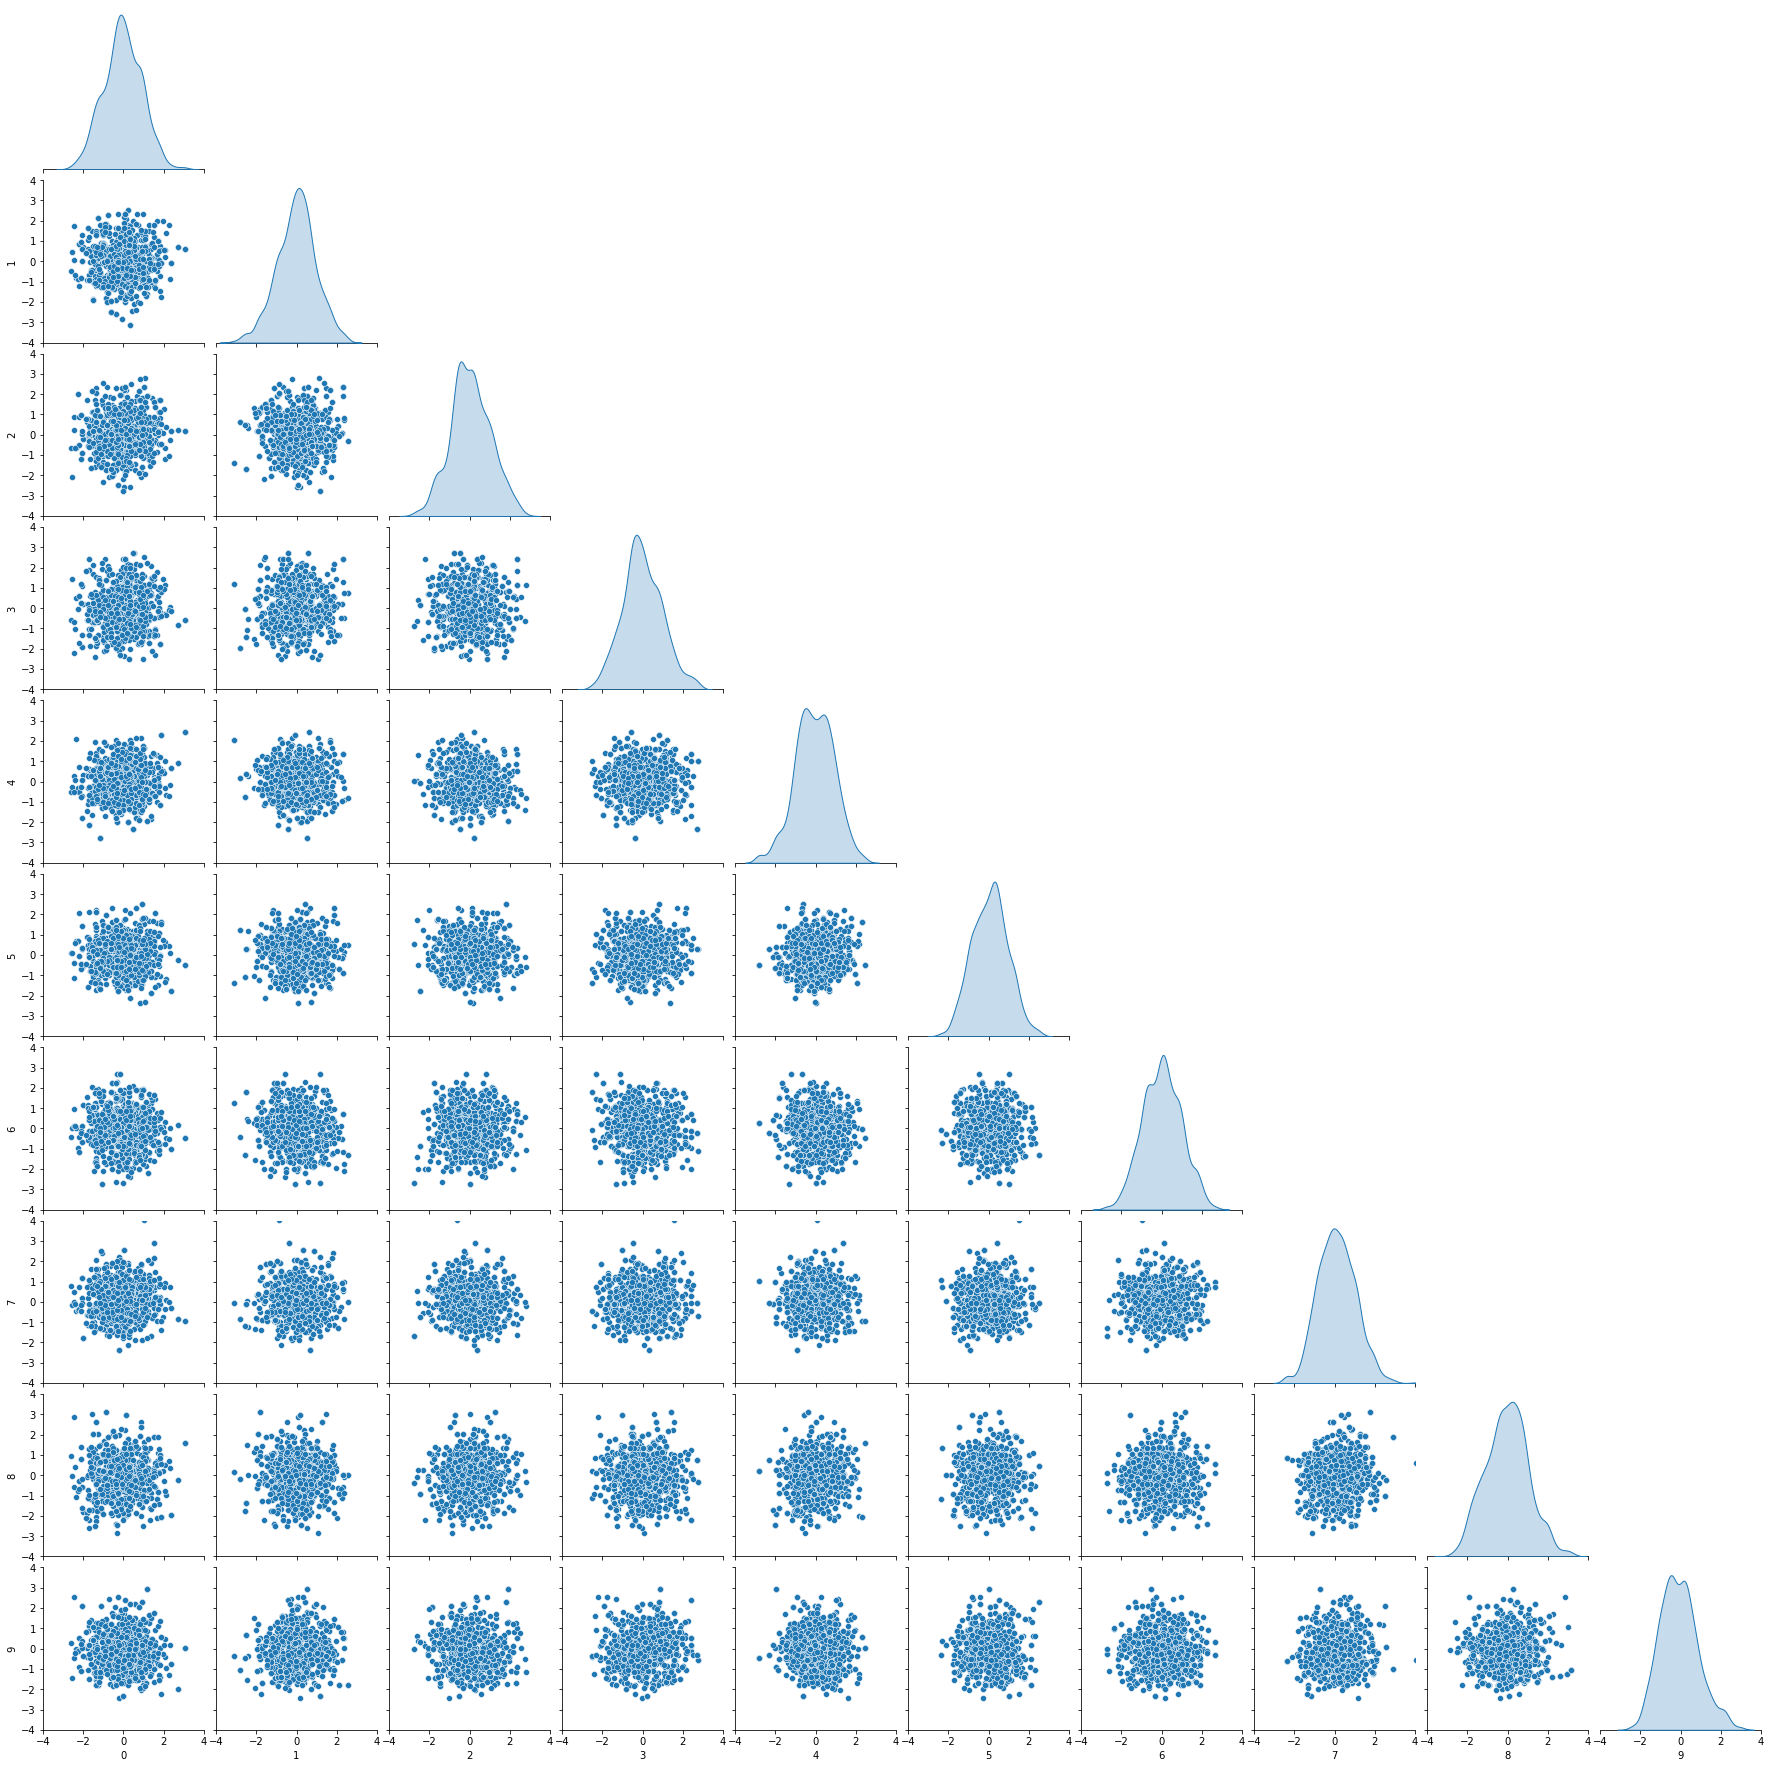

In [23]:
posterior = trace['qw_posterior'][0]
betas = trace['betas']

x = np.asarray(posterior).squeeze()
w = np.asarray(np.clip(trace['qw_posterior_weights'][0], a_min=0, a_max=None)).astype(np.float64)
w /= w.sum()

resamp_idx = np.random.choice(np.arange(len(x)), size=len(x), p=w)
posterior = x[resamp_idx, ...]

plt.figure()
g = sns.pairplot(pd.DataFrame(posterior[:, :]), diag_kind='kde', corner=True)
g.set(xlim=(-4, 4), ylim=(-4, 4))
plt.savefig('qw_nfmc_weighted_posterior.png')
plt.show()

<Figure size 432x288 with 0 Axes>

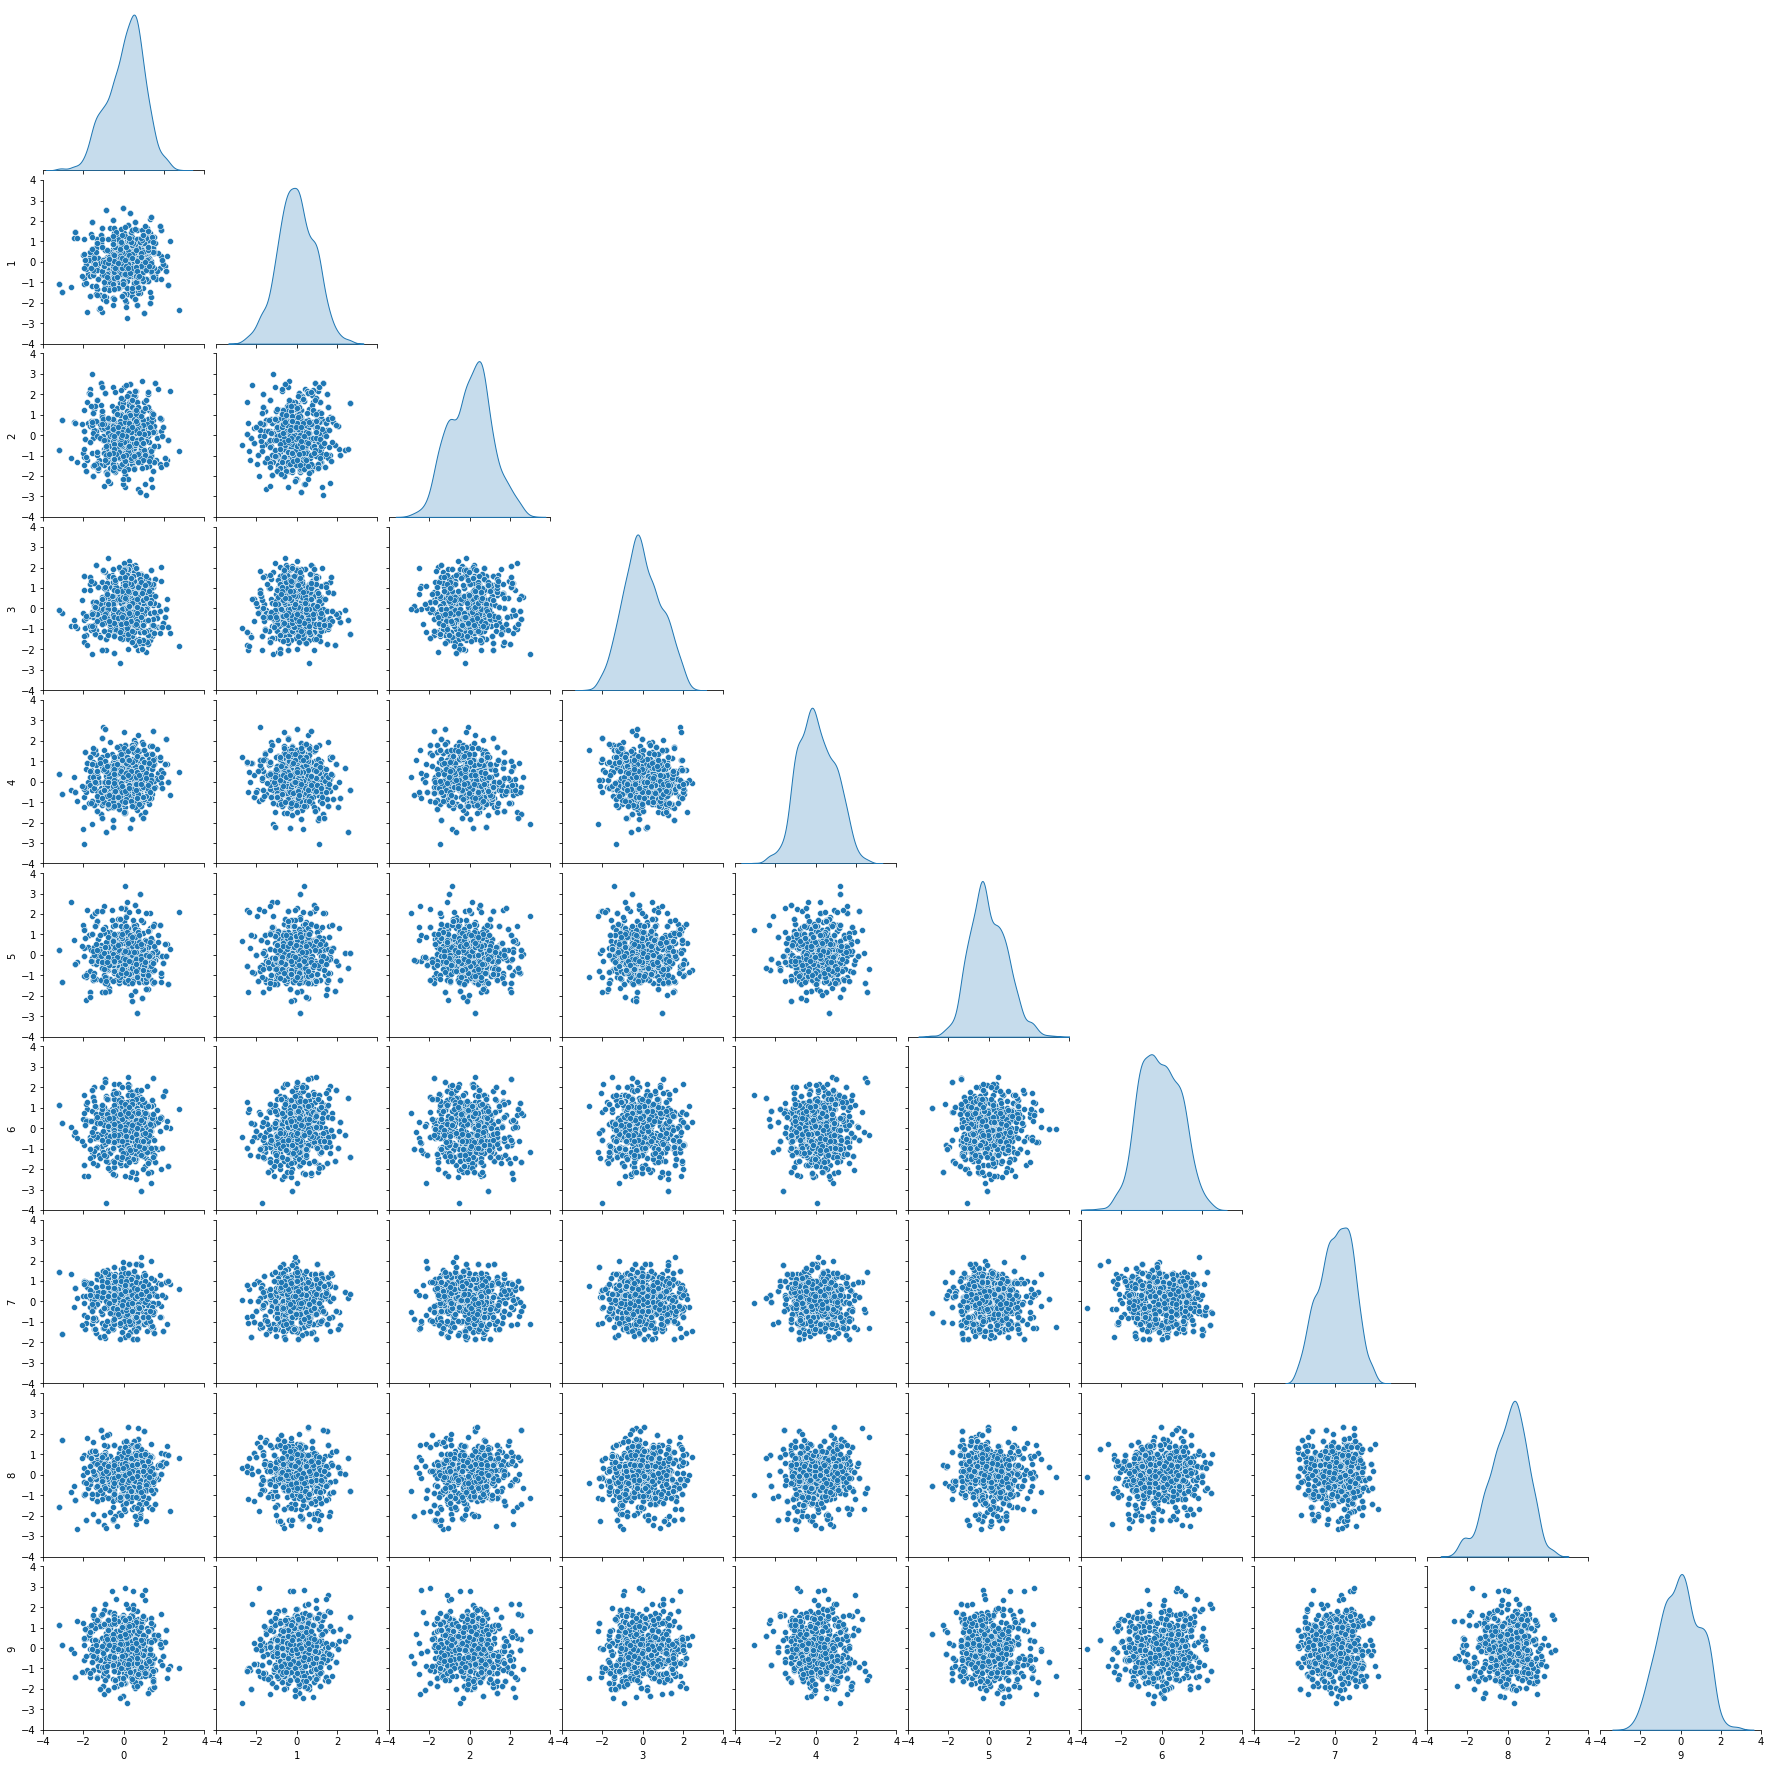

In [24]:
posterior = trace['quw_posterior'][0]
betas = trace['betas']

x = np.asarray(posterior).squeeze()
w = np.asarray(np.clip(trace['quw_posterior_weights'][0], a_min=0, a_max=None)).astype(np.float64)
w /= np.sum(w)

resamp_idx = np.random.choice(np.arange(len(x)), size=len(x), p=w)
posterior = x[resamp_idx, ...]

plt.figure()
g = sns.pairplot(pd.DataFrame(posterior[:, :]), diag_kind='kde', corner=True)
g.set(xlim=(-4, 4), ylim=(-4, 4))
plt.savefig('quw_nfmc_weighted_posterior.png')
plt.show()

qw weighted mean = 0.9660811424255371
qw weighted sd = 0.9571613669395447
sigma_prod = 0.9805806875228882
quw weighted mean = 1.206615924835205
quw weighted sd = 1.0484956502914429


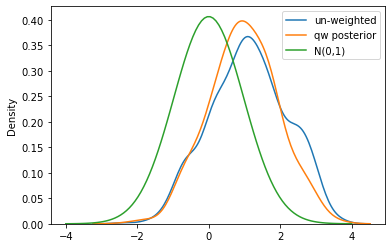

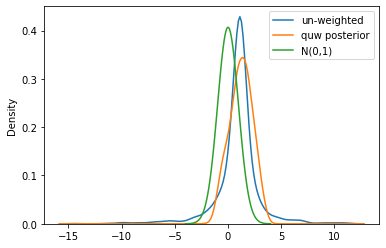

In [9]:
posterior = trace['qw_posterior'][0]
betas = trace['betas']

x = np.asarray(posterior).squeeze()
w = np.clip(trace['qw_posterior_weights'][0], a_min=0, a_max=None)

qw_mu = jnp.average(x[:,0], weights=w)
qw_sd = jnp.sqrt(jnp.average((x[:,0] - qw_mu) ** 2, weights=w))

print(f'qw weighted mean = {qw_mu}')
print(f'qw weighted sd = {qw_sd}')

sigma_prod = jnp.sqrt((5.0 ** 2) / (5.0 ** 2 + 1.0 ** 2))
print(f'sigma_prod = {sigma_prod}')
def gauss(z, mu=0, cov=jnp.array([[sigma_prod ** 2]])):
    return jax.vmap(lambda x: jnp.exp(mvn.logpdf(x, mu, cov)))(z).squeeze()

z = jnp.linspace(-4, 4, 100)
plt.figure()
sns.kdeplot(x[:,0], label='un-weighted')
sns.kdeplot(x[:,0], weights=w, label='qw posterior')
plt.plot(z, gauss(z), label='N(0,1)')
plt.legend(loc='upper right')

posterior = trace['quw_posterior'][0]

x = np.asarray(posterior).squeeze()
w = np.clip(trace['quw_posterior_weights'][0], a_min=0, a_max=None)

quw_mu = jnp.average(x[:,0], weights=w)
quw_sd = jnp.sqrt(jnp.average((x[:,0] - quw_mu) ** 2, weights=w))

print(f'quw weighted mean = {quw_mu}')
print(f'quw weighted sd = {quw_sd}')

z = np.linspace(-4, 4, 100)
plt.figure()
sns.kdeplot(x[:,0], label='un-weighted')
sns.kdeplot(x[:,0], weights=w, label='quw posterior')
plt.plot(z, gauss(z), label='N(0,1)')
plt.legend(loc='upper right')

dict_keys(['q1_w', 'q1_uw', 'q2_w', 'q2_uw', 'q3_w', 'q3_uw', 'q_nfmc_1_w', 'q_nfmc_1_uw', 'q_nfmc_2_w', 'q_nfmc_2_uw', 'q_nfmc_3_w', 'q_nfmc_3_uw', 'q_nfmc_4_w', 'q_nfmc_4_uw', 'q_nfmc_5_w', 'q_nfmc_5_uw'])
dict_keys(['q1_w', 'q1_uw', 'q2_w', 'q2_uw', 'q3_w', 'q3_uw', 'q_nfmc_1_w', 'q_nfmc_1_uw', 'q_nfmc_2_w', 'q_nfmc_2_uw', 'q_nfmc_3_w', 'q_nfmc_3_uw', 'q_nfmc_4_w', 'q_nfmc_4_uw', 'q_nfmc_5_w', 'q_nfmc_5_uw'])


<AxesSubplot:ylabel='Density'>

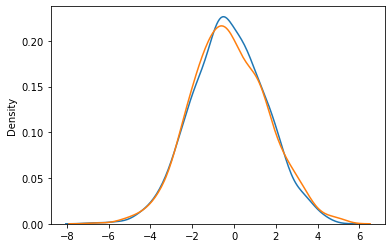

In [5]:
q_models = trace['q_models'][0]
print(q_models.keys())
q1 = q_models['q1_w'][0]
import torch
q1_samples, _ = q1.sample(1000, device='cpu') 
q1_samples = q1_samples.numpy()

sns.kdeplot(q1_samples.squeeze())

q_models = trace['q_models'][0]
print(q_models.keys())
q2 = q_models['q_nfmc_1_w'][0]
import torch
q2_samples, _ = q2.sample(1000, device='cpu') 
q2_samples = q2_samples.numpy()

sns.kdeplot(q2_samples.squeeze())

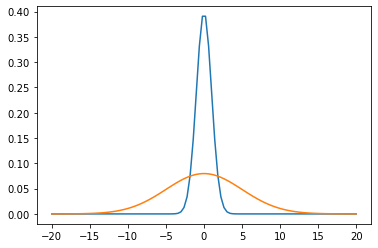

In [57]:
def gauss(z, mu=0, cov=jnp.array([[sigma_prod ** 2]])):
    return jax.vmap(lambda x: jnp.exp(mvn.logpdf(x, mu, cov)))(z).squeeze()

z = jnp.linspace(-20, 20, 100)
plt.figure()
plt.plot(z, gauss(z, cov=jnp.array([[1 ** 2]])), label='N(0,1^2)')
plt.plot(z, gauss(z, cov=jnp.array([[5 ** 2]])), label='N(0,5^2)')

# Correlated Gaussian test

In [2]:
n = 10

key = jax.random.PRNGKey(0)
jax_prior_init = jax.random.uniform(key, shape=(10 * n, n), minval=-1, maxval=1)
print(jnp.shape(jax_prior_init))
print(jax_prior_init)

(100, 10)
[[-8.84091854e-01 -4.43298101e-01 -1.22544289e-01 -5.09226084e-01
   4.90239620e-01  2.34477520e-01  5.42016745e-01  6.91947699e-01
   9.19848204e-01  7.04192400e-01]
 [ 7.50247955e-01  7.75618553e-02 -1.93581581e-02 -8.29578400e-01
   1.59775496e-01 -3.33229303e-01 -1.17771864e-01  4.73334551e-01
  -6.47885323e-01 -3.71244907e-01]
 [ 1.63232803e-01  5.28733253e-01 -6.22561693e-01 -3.91986847e-01
   5.72552443e-01 -3.86230469e-01  7.46369123e-01 -4.86523390e-01
   3.35375786e-01  5.44512987e-01]
 [ 2.36198425e-01  2.10574150e-01 -9.22422409e-02 -1.90681696e-01
   4.45937634e-01 -7.79232264e-01 -7.89236546e-01  3.00645828e-04
   8.02695751e-01 -4.50159311e-01]
 [ 1.41799450e-02 -8.90784979e-01 -9.27755117e-01  3.31110477e-01
  -6.48730993e-01 -7.78982401e-01 -5.01650810e-01 -9.97568130e-01
   2.93876886e-01  5.40287733e-01]
 [-7.28118896e-01  6.98439837e-01  8.96300077e-01 -9.57493782e-01
   9.91392136e-01 -2.73618221e-01  8.73942852e-01  5.49952269e-01
  -1.89256191e-01  7.09

In [3]:
def run_nfo(log_like,log_prior,
    n, #number of sobol points
    low=-1.,
    high=1.,
    knots=None,
    knots_trainable=5,
    bw=1.,
    rel_bw=1,
    layers=5,
    ktrunc=jnp.inf,
    t_ess=0.7,
    beta_max=1.0,
    min_delta_beta=0.05,
    rel_beta=0.5,
    frac_rel_beta_AF = 1,
    alpha_w = (0,0),
    alpha_uw = (0,0),
    latent_sigma=2.4/(2**2),  #FIXME put this in the code as default
    use_latent_beta2=False,
    use_pq_beta_IW1=False, 
    top_verbose=True,
    verbose=False,
    trainable_qw=True,
    sgd_steps=10,
    gamma=0,
    optimize_directions=False,
    snf_loss=2,
    logp_cut='adaptive',
    a=1,
    b=1,
    c=1,
    d=1,
    Ntemp=None,
    eps_z=0.1,
    cull_lowp_tol=0.01, 
    max_cull_frac=0.5,
    ess_tol=1.0,
    local_thresh=jnp.inf,
    nfmc_draws=100, 
    nf_iter=100,
    edge_bins=0,
    local_step_factor=0.25,
    nfmc_local_exploration=True,
    nfmc_AF_samples=200,
    nfmc_full_qw_samples=True,
    agressive_cull=False,
    cull_mode='importance_weights',
    cull_iw_tol=1e-3,
    nfmc_frac_validate=0.0):
    
    ntemp = int(12*n) if(Ntemp is None) else Ntemp
    
    n_prior = 10*n
    n0=n_prior
    N=n_prior
    aN=int(2*N*a)
    bN=n*b
    cN=n*c
    dN=n*d
    if(n<6):
        latent_sigma=1
    else:
        latent_sigma*=((n)**(-1/2))
    dist1d = chaospy.Iid(chaospy.Uniform(lower=low,upper=high),n)
    bounds=np.array([low*np.ones(n),high*np.ones(n)])
    init_prior=dist1d
    init_prior = np.atleast_2d(dist1d.sample(n_prior+1,rule='sobol')).T[1:] #drop first (0,0) sample because cheating
    #init_prior = jax_prior_init
    trace = nfmc_jax.infer_nfomc(log_like, log_prior, jnp.array(init_prior), 
                             log_prior_args=((jnp.array([low]), jnp.array([high]))), 
                             inference_mode="sampling", 
                              vmap=True, parallel_backend=None, 
                               n0=n0,
                               N=N,
                               t_ess=t_ess,
                               N_AF=aN,
                               expl_top_AF=bN,
                               expl_top_qw=cN,
                               expl_latent=dN,
                               bounds=bounds,
                               beta_max=beta_max,
                               N_temp=ntemp,
                               rel_bw=rel_bw,
                               rel_beta=rel_beta,
                               frac_rel_beta_AF = frac_rel_beta_AF,
                               latent_sigma=latent_sigma,
                               use_latent_beta2=use_latent_beta2,
                               use_pq_beta_IW1=use_pq_beta_IW1,
                               k_trunc=ktrunc,
                               #sinf parameters
                               frac_validate=0.0,
                               alpha_w=alpha_w,
                               alpha_uw=alpha_uw,
                               NBfirstlayer=True, 
                               verbose=verbose,interp_nbin=knots,iteration=layers,
                               bw_factor_min=bw,bw_factor_max=bw,bw_factor_num=1, #manually force bw factor
                               trainable_qw=trainable_qw,
                               sgd_steps=sgd_steps,
                               gamma=gamma,
                               knots_trainable=knots_trainable,
                               optimize_directions=optimize_directions,
                               logp_cut=logp_cut,
                               random_seed=seed,
                               eps_z=eps_z,
                               cull_lowp_tol=cull_lowp_tol, 
                               max_cull_frac=max_cull_frac,
                               ess_tol=ess_tol,
                               local_thresh=local_thresh,
                               nfmc_draws=nfmc_draws, 
                               nf_iter=nf_iter,
                               top_verbose=top_verbose,
                               edge_bins=edge_bins,
                               local_step_factor=local_step_factor,
                               nfmc_AF_samples=nfmc_AF_samples,
                               nfmc_full_qw_samples=nfmc_full_qw_samples,
                               nfmc_local_exploration=nfmc_local_exploration,
                               agressive_cull=agressive_cull,
                               cull_mode=cull_mode,
                               cull_iw_tol=cull_iw_tol,
                               nfmc_frac_validate=nfmc_frac_validate,
                               min_delta_beta=min_delta_beta,
                               snf_loss=snf_loss
                             )
    
    return trace


def log_flat_prior(x,low,high):
    n=x.shape[-1]
    return -n*jnp.log((high-low))


def plot_Zs(trace,low,high,n,beta_max):
    Zuws = np.array([trace['logZ'][0]['q{0}_pq_uw'.format(i)] for i in range(1,len(trace['betas'][0]))])
    Zws = np.array([trace['logZ'][0]['q{0}_pq_w'.format(i)] for i in range(1,len(trace['betas'][0]))])
    Zts = np.log(np.array([trace['logZ'][0]['q{0}_pq_w_trainable'.format(i)] for i in range(1,len(trace['betas'][0]))]))
    plt.plot(np.array(trace['betas'][0][1:])*beta_max,Zuws,ls=' ',marker='s',label='uw')
    plt.plot(np.array(trace['betas'][0][1:])*beta_max,Zts,ls=' ',marker='d',label='w_t')
    plt.plot(np.array(trace['betas'][0][1:])*beta_max,Zws,ls=' ',marker='.',label='w')
    if(low is not None and high is not None):plt.axhline(np.log((high-low)**-n),ls='--',c='k',zorder=-1,label='prior norm' )
    plt.ylabel(r'$\log Z$')
    plt.legend(prop={"size":10})
    plt.xlabel(r'$\beta$')
    plt.show()

In [4]:

def get_icov(n,target=200,iseed=seed,eps=1,scale=50, just_do_it=False):
    condition=0
    eigmax=np.inf
    this_seed=iseed
    if just_do_it:
        wish = scipy.stats.wishart(df=n, scale=np.eye(n)* scale,seed=this_seed)
        iC = wish.rvs(size=1)
        C = np.linalg.inv(iC)
        eigs = np.linalg.eigvals(C)
        eigmax,eigmin = eigs.max(),eigs.min()
        condition = eigmax/eigmin
    elif not just_do_it:
        while(abs(condition-target)>eps):
            wish = scipy.stats.wishart(df=n, scale=np.eye(n)* scale,seed=this_seed)
            iC = wish.rvs(size=1)
            C = np.linalg.inv(iC)
            eigs = np.linalg.eigvals(C)
            eigmax,eigmin = eigs.max(),eigs.min()
            condition = eigmax/eigmin
            this_seed += 1
    print("PSD: ",np.all(eigs>0))
    print("Condition number: ", condition)
    print("Op norm: ", eigmax)
    return iC,C

iCov,Cov=get_icov(n,eps=1)
def log_like_cg(x,mu_diag=0,icov=iCov):
    n=x.shape[-1]
    mu = mu_diag*jnp.ones(n)
    #return -0.5 * ( n*jnp.log( (2 * jnp.pi)) + jnp.log( 1/jnp.linalg.det(icov) )) - 0.5 * jnp.dot((x - mu),jnp.dot(icov,(x - mu)))
    return - 0.5 * jnp.dot((x - mu),jnp.dot(icov,(x - mu)))

PSD:  True
Condition number:  199.08320751596906
Op norm:  0.1587924033016887


In [5]:
from scipy.stats import multivariate_normal as n_mvn

def t2a(tens): return tens.numpy().astype(np.float64)
def a2t(arr): return torch.from_numpy(arr.astype(np.float32))

def plot_corr_gd(trace,Cov,Ngd=1000,beta_idx=None, out_name=None):
    qmodels=trace['q_models']
    logp=trace['logp']
    samples=trace['q_samples']
    #qnums = np.unique([int(s.split('q')[1].split('_')[0]) for s in list(trace['q_models'][0].keys())])
    names = ["x%s"%i for i in range(n)]
    labels =  ["x_%s"%i for i in range(n)]

    truth = n_mvn.rvs(mean=np.zeros(n),cov=Cov,size=Ngd)
    truth_gd = MCSamples(samples=truth,names = names, labels = labels, label='truth')

    #if(beta_idx is None): beta_idx=qnums.max()
    s_w,s_uw = t2a(qmodels[0]['q{0}_w'.format(beta_idx)].sample(Ngd,device='cpu')[0]),t2a(qmodels[0]['q{0}_uw'.format(beta_idx)].sample(Ngd,device='cpu')[0])
    samples_w = MCSamples(samples=s_w,names = names, labels = labels, label='q_w')
    samples_uw = MCSamples(samples=s_uw,names = names, labels = labels, label='q_uw')

    # Triangle plot
    plt.figure()
    g = plots.get_subplot_plotter()
    g.triangle_plot([samples_uw,truth_gd,samples_w], filled=True)
    plt.show()
    if out_name is not None:
        g.export(out_name)

In [6]:
def plot_triangles(samples, weights, Cov, Ngd=1000, beta_idx=None,
                   out_name=None):

    names = ["x%s"%i for i in range(n)]
    labels =  ["x_%s"%i for i in range(n)]
    
    truth = n_mvn.rvs(mean=np.zeros(n),cov=Cov,size=Ngd)
    truth_gd = MCSamples(samples=truth,names = names, labels = labels, label='truth')

    samples_w = MCSamples(samples=samples, weights=weights,
                          names=names, labels=labels, 
                          label='posterior samples')

    # Triangle plot
    plt.figure()
    g = plots.get_subplot_plotter()
    g.triangle_plot([truth_gd, samples_w], filled=True)
    plt.show()
    if out_name is not None:
        g.export(out_name)

In [7]:
snf_loss = 2
nf_cull = 0

# IW cull, gentle.

In [ ]:
warnings.filterwarnings('ignore')
cg10 = run_nfo(n=n,log_like=log_like_cg,log_prior=log_flat_prior,
               beta_max=1,c=0,t_ess=0.9,frac_rel_beta_AF=.75,b=2,d=2, Ntemp=500,
               min_delta_beta=1e-2, nfmc_draws=1000, nfmc_local_exploration=False,
               agressive_cull=False, local_thresh=3, cull_mode='importance_weights',
               snf_loss=snf_loss)

qw = cg10['qw_posterior'][0]
qw_iw = cg10_iw1['qw_posterior_weights'][0]
qw = qw[qw_iw != 0.0]
qw_iw = np.asarray(qw_iw[qw_iw != 0.0])

resample_idx = np.random.choice(np.arange(len(qw)), size=10000, p=qw_iw/qw_iw.sum())
posterior = qw[resample_idx, ...]

plot_corr_gd(cg10, Cov, beta_idx=100, out_name=f'./qw_quw_nfo_10d_cg_cullIW_snfloss{snf_loss}_nfcull{nf_cull}.png') 

plot_triangles(qw, qw_iw, Cov, out_name=f'./qw_weighted_10d_cg_cullIW_snfloss{snf_loss}_nfcull{nf_cull}.png')
plot_triangles(qw, np.ones(len(qw)), Cov, out_name=f'./qw_unweighted_10d_cg_cullIW_snfloss{snf_loss}_nfcull{nf_cull}.png')

quw = cg10['quw_posterior'][0]
quw_iw = cg10['quw_posterior_weights'][0]
quw = quw[quw_iw != 0.0]
quw_iw = np.asarray(quw_iw[quw_iw != 0.0])
resample_idx = np.random.choice(np.arange(len(quw)), size=10000, p=quw_iw/quw_iw.sum())

posterior = quw[resample_idx, ...]

plot_triangles(quw, quw_iw, Cov, out_name=f'./quw_weighted_10d_cg_cullIW_snfloss{snf_loss}_nfcull{nf_cull}.png')

In [8]:
warnings.filterwarnings('ignore')
cg10 = run_nfo(n=n,log_like=log_like_cg,log_prior=log_flat_prior,
               beta_max=1,c=0,t_ess=0.9,frac_rel_beta_AF=.75,b=2,d=2, Ntemp=500,
               min_delta_beta=1e-2, nfmc_draws=1000, nfmc_local_exploration=True,
               agressive_cull=False, local_thresh=jnp.inf, cull_mode='importance_weights',
               snf_loss=snf_loss)

qw = cg10['qw_posterior'][0]
qw_iw = cg10['qw_posterior_weights'][0]
qw = qw[qw_iw != 0.0]
qw_iw = np.asarray(qw_iw[qw_iw != 0.0])

resample_idx = np.random.choice(np.arange(len(qw)), size=10000, p=qw_iw/qw_iw.sum())
posterior = qw[resample_idx, ...]

plot_corr_gd(cg10, Cov, beta_idx=100, out_name=f'./qw_quw_nfo_10d_cg_cullIW_AF_snfloss{snf_loss}_nfcull{nf_cull}.png') 

plot_triangles(qw, qw_iw, Cov, out_name=f'./qw_weighted_10d_cg_cullIW_AF_snfloss{snf_loss}_nfcull{nf_cull}.png')
plot_triangles(qw, np.ones(len(qw)), Cov, out_name=f'./qw_unweighted_10d_cg_cullIW_AF_snfloss{snf_loss}_nfcull{nf_cull}.png')

quw = cg10['quw_posterior'][0]
quw_iw = cg10['quw_posterior_weights'][0]
quw = quw[quw_iw != 0.0]
quw_iw = np.asarray(quw_iw[quw_iw != 0.0])
resample_idx = np.random.choice(np.arange(len(quw)), size=10000, p=quw_iw/quw_iw.sum())

posterior = quw[resample_idx, ...]

plot_triangles(quw, quw_iw, Cov, out_name=f'./quw_weighted_10d_cg_cullIW_AF_snfloss{snf_loss}_nfcull{nf_cull}.png')

Inference mode is sampling. Maximum beta is set to 1.
Calculating logp threshold based on quw evidence.
Adaptive logp cut = -857.506103515625
After first quw fit, beta=0.00
min_delta_beta = 0.01
Updated beta = 9.5367431640625e-07
ESS3 = 61
beta_prod=0.0000
beta_intern=0.0000
norm-logZ_w_pq = -123.0367
norm-logZ_uw_pq = -120.6354
norm-logZw_t = 6.6246
Calculating logp threshold based on quw evidence.
Adaptive logp cut = -595.447509765625
After first quw fit, beta=0.00
min_delta_beta = 0.01
Updated beta = 1.9073481780651491e-06
ESS3 = 43
beta_prod=0.0000
beta_intern=0.0000
norm-logZ_w_pq = -134.6686
norm-logZ_uw_pq = -126.6618
norm-logZw_t = 7.0996
Calculating logp threshold based on quw evidence.
Adaptive logp cut = -574.5518798828125
After first quw fit, beta=0.00
min_delta_beta = 0.01
Updated beta = 2.861021584976914e-06
using beta2=0.00 at idx 1, at stage-1 = 2
ESS3 = 56
beta_prod=0.0000
beta_intern=0.0000
norm-logZ_w_pq = -131.0854
norm-logZ_uw_pq = -127.9231
norm-logZw_t = 7.4286
C

Calculating logp threshold based on quw evidence.
Adaptive logp cut = -117.7100830078125
After first quw fit, beta=0.04
min_delta_beta = 0.01
Updated beta = 0.037225123967452506
using beta2=0.02 at idx 16, at stage-1 = 24
ESS3 = 90
beta_prod=0.0372
beta_intern=0.0372
norm-logZ_w_pq = -43.1941
norm-logZ_uw_pq = -40.0282
norm-logZw_t = -4.9431
Calculating logp threshold based on quw evidence.
Adaptive logp cut = -60.97499465942383
After first quw fit, beta=0.04
min_delta_beta = 0.01
Updated beta = 0.03759737520712703
using beta2=0.02 at idx 16, at stage-1 = 25
ESS3 = 83
beta_prod=0.0376
beta_intern=0.0376
norm-logZ_w_pq = -43.8518
norm-logZ_uw_pq = -40.2576
norm-logZw_t = -4.6950
Calculating logp threshold based on quw evidence.
Adaptive logp cut = -60.97499465942383
After first quw fit, beta=0.04
min_delta_beta = 0.01
Updated beta = 0.038316028512104895
using beta2=0.02 at idx 16, at stage-1 = 26
ESS3 = 90
beta_prod=0.0383
beta_intern=0.0383
norm-logZ_w_pq = -38.9142
norm-logZ_uw_pq = -

Calculating logp threshold based on quw evidence.
Adaptive logp cut = -60.95841598510742
After first quw fit, beta=0.07
min_delta_beta = 0.01
Updated beta = 0.072016806116669
using beta2=0.04 at idx 24, at stage-1 = 48
ESS3 = 90
beta_prod=0.0720
beta_intern=0.0720
norm-logZ_w_pq = -28.7648
norm-logZ_uw_pq = -25.0605
norm-logZw_t = -4.1889
Calculating logp threshold based on quw evidence.
Adaptive logp cut = -60.95841598510742
After first quw fit, beta=0.07
min_delta_beta = 0.01
Updated beta = 0.07295820416055734
using beta2=0.04 at idx 24, at stage-1 = 49
ESS3 = 90
beta_prod=0.0730
beta_intern=0.0730
norm-logZ_w_pq = -29.2221
norm-logZ_uw_pq = -25.0817
norm-logZw_t = -5.9071
Calculating logp threshold based on quw evidence.
Adaptive logp cut = -60.95841598510742
After first quw fit, beta=0.07
min_delta_beta = 0.01
Updated beta = 0.07368778620216292
using beta2=0.04 at idx 24, at stage-1 = 50
ESS3 = 84
beta_prod=0.0737
beta_intern=0.0737
norm-logZ_w_pq = -28.2338
norm-logZ_uw_pq = -25.1

Calculating logp threshold based on quw evidence.
Adaptive logp cut = -44.581451416015625
After first quw fit, beta=0.12
min_delta_beta = 0.01
Updated beta = 0.13014703437274167
using beta2=0.07 at idx 42, at stage-1 = 72
ESS3 = 90
beta_prod=0.1301
beta_intern=0.1301
norm-logZ_w_pq = -17.0003
norm-logZ_uw_pq = -15.0940
norm-logZw_t = -10.9131
Calculating logp threshold based on quw evidence.
Adaptive logp cut = -42.34601974487305
After first quw fit, beta=0.13
min_delta_beta = 0.01
Updated beta = 0.13144850471646907
using beta2=0.07 at idx 43, at stage-1 = 73
ESS3 = 78
beta_prod=0.1314
beta_intern=0.1314
norm-logZ_w_pq = -17.5438
norm-logZ_uw_pq = -14.8952
norm-logZw_t = -10.6942
Calculating logp threshold based on quw evidence.
Adaptive logp cut = -42.34601974487305
After first quw fit, beta=0.13
min_delta_beta = 0.01
Updated beta = 0.13276298976363377
using beta2=0.07 at idx 44, at stage-1 = 74
ESS3 = 73
beta_prod=0.1328
beta_intern=0.1328
norm-logZ_w_pq = -15.9126
norm-logZ_uw_pq = 

Calculating logp threshold based on quw evidence.
Adaptive logp cut = -22.86855697631836
After first quw fit, beta=0.16
min_delta_beta = 0.01
Updated beta = 0.16525219894674423
using beta2=0.08 at idx 56, at stage-1 = 96
ESS3 = 25
beta_prod=0.1653
beta_intern=0.1653
norm-logZ_w_pq = -24.3282
norm-logZ_uw_pq = -10.9775
norm-logZw_t = -9.4193
Calculating logp threshold based on quw evidence.
Adaptive logp cut = -22.86855697631836
After first quw fit, beta=0.17
min_delta_beta = 0.01
Updated beta = 0.16690472093621167
using beta2=0.09 at idx 57, at stage-1 = 97
ESS3 = 27
beta_prod=0.1669
beta_intern=0.1669
norm-logZ_w_pq = -24.9281
norm-logZ_uw_pq = -11.1070
norm-logZw_t = -9.6297
Calculating logp threshold based on quw evidence.
Adaptive logp cut = -22.86855697631836
After first quw fit, beta=0.17
min_delta_beta = 0.01
Updated beta = 0.1685737681455738
using beta2=0.09 at idx 57, at stage-1 = 98
ESS3 = 23
beta_prod=0.1686
beta_intern=0.1686
norm-logZ_w_pq = -26.2823
norm-logZ_uw_pq = -11.

Calculating logp threshold based on quw evidence.
Adaptive logp cut = -22.86855697631836
After first quw fit, beta=0.21
min_delta_beta = 0.01
Updated beta = 0.20982644274877038
using beta2=0.10 at idx 69, at stage-1 = 120
ESS3 = 38
beta_prod=0.2098
beta_intern=0.2098
norm-logZ_w_pq = -22.0148
norm-logZ_uw_pq = -11.9300
norm-logZw_t = -11.4188
Calculating logp threshold based on quw evidence.
Adaptive logp cut = -22.86855697631836
After first quw fit, beta=0.21
min_delta_beta = 0.01
Updated beta = 0.21192470717625808
using beta2=0.10 at idx 69, at stage-1 = 121
ESS3 = 29
beta_prod=0.2119
beta_intern=0.2119
norm-logZ_w_pq = -24.5294
norm-logZ_uw_pq = -12.1180
norm-logZw_t = -11.1021
Calculating logp threshold based on quw evidence.
Adaptive logp cut = -22.86855697631836
After first quw fit, beta=0.21
min_delta_beta = 0.01
Updated beta = 0.21404395424802067
using beta2=0.10 at idx 69, at stage-1 = 122
ESS3 = 36
beta_prod=0.2140
beta_intern=0.2140
norm-logZ_w_pq = -24.7090
norm-logZ_uw_pq 

KeyboardInterrupt: 

In [ ]:
warnings.filterwarnings('ignore')
cg10 = run_nfo(n=n,log_like=log_like_cg,log_prior=log_flat_prior,
               beta_max=1,c=0,t_ess=0.9,frac_rel_beta_AF=.75,b=2,d=2, Ntemp=500,
               min_delta_beta=1e-2, nfmc_draws=1000, nfmc_local_exploration=True,
               agressive_cull=False, local_thresh=3, cull_mode='importance_weights',
               snf_loss=snf_loss)

qw = cg10['qw_posterior'][0]
qw_iw = cg10['qw_posterior_weights'][0]
qw = qw[qw_iw != 0.0]
qw_iw = np.asarray(qw_iw[qw_iw != 0.0])

resample_idx = np.random.choice(np.arange(len(qw)), size=10000, p=qw_iw/qw_iw.sum())
posterior = qw[resample_idx, ...]

plot_corr_gd(cg10, Cov, beta_idx=100, out_name=f'./qw_quw_nfo_10d_cg_cullIW_AF_local_snfloss{snf_loss}_nfcull{nf_cull}.png') 

plot_triangles(qw, qw_iw, Cov, out_name=f'./qw_weighted_10d_cg_cullIW_AF_local_snfloss{snf_loss}_nfcull{nf_cull}.png')
plot_triangles(qw, np.ones(len(qw)), Cov, out_name=f'./qw_unweighted_10d_cg_cullIW_AF_local_snfloss{snf_loss}_nfcull{nf_cull}.png')

quw = cg10['quw_posterior'][0]
quw_iw = cg10['quw_posterior_weights'][0]
quw = quw[quw_iw != 0.0]
quw_iw = np.asarray(quw_iw[quw_iw != 0.0])
resample_idx = np.random.choice(np.arange(len(quw)), size=10000, p=quw_iw/quw_iw.sum())

posterior = quw[resample_idx, ...]

plot_triangles(quw, quw_iw, Cov, out_name=f'./quw_weighted_10d_cg_cullIW_AF_local_snfloss{snf_loss}_nfcull{nf_cull}.png')

# Z cull, gentle

In [ ]:
warnings.filterwarnings('ignore')
cg10 = run_nfo(n=n,log_like=log_like_cg,log_prior=log_flat_prior,
               beta_max=1,c=0,t_ess=0.9,frac_rel_beta_AF=.75,b=2,d=2, Ntemp=500,
               min_delta_beta=1e-2, nfmc_draws=1000, nfmc_local_exploration=False,
               agressive_cull=False, local_thresh=3, cull_mode='evidence',
               snf_loss=snf_loss)

qw = cg10['qw_posterior'][0]
qw_iw = cg10['qw_posterior_weights'][0]
qw = qw[qw_iw != 0.0]
qw_iw = np.asarray(qw_iw[qw_iw != 0.0])

resample_idx = np.random.choice(np.arange(len(qw)), size=10000, p=qw_iw/qw_iw.sum())
posterior = qw[resample_idx, ...]

plot_corr_gd(cg10, Cov, beta_idx=100, out_name=f'./qw_quw_nfo_10d_cg_cullZ_snfloss{snf_loss}_nfcull{nf_cull}.png') 

plot_triangles(qw, qw_iw, Cov, out_name=f'./qw_weighted_10d_cg_cullZ_snfloss{snf_loss}_nfcull{nf_cull}.png')
plot_triangles(qw, np.ones(len(qw)), Cov, out_name=f'./qw_unweighted_10d_cg_cullZ_snfloss{snf_loss}_nfcull{nf_cull}.png')

quw = cg10['quw_posterior'][0]
quw_iw = cg10['quw_posterior_weights'][0]
quw = quw[quw_iw != 0.0]
quw_iw = np.asarray(quw_iw[quw_iw != 0.0])
resample_idx = np.random.choice(np.arange(len(quw)), size=10000, p=quw_iw/quw_iw.sum())

posterior = quw[resample_idx, ...]

plot_triangles(quw, quw_iw, Cov, out_name=f'./quw_weighted_10d_cg_cullZ_snfloss{snf_loss}_nfcull{nf_cull}.png')

In [ ]:
warnings.filterwarnings('ignore')
cg10 = run_nfo(n=n,log_like=log_like_cg,log_prior=log_flat_prior,
               beta_max=1,c=0,t_ess=0.9,frac_rel_beta_AF=.75,b=2,d=2, Ntemp=500,
               min_delta_beta=1e-2, nfmc_draws=1000, nfmc_local_exploration=True,
               agressive_cull=False, local_thresh=jnp.inf, cull_mode='evidence',
               snf_loss=snf_loss)

qw = cg10['qw_posterior'][0]
qw_iw = cg10['qw_posterior_weights'][0]
qw = qw[qw_iw != 0.0]
qw_iw = np.asarray(qw_iw[qw_iw != 0.0])

resample_idx = np.random.choice(np.arange(len(qw)), size=10000, p=qw_iw/qw_iw.sum())
posterior = qw[resample_idx, ...]

plot_corr_gd(cg10, Cov, beta_idx=100, out_name=f'./qw_quw_nfo_10d_cg_cullZ_AF_snfloss{snf_loss}_nfcull{nf_cull}.png') 

plot_triangles(qw, qw_iw, Cov, out_name=f'./qw_weighted_10d_cg_cullZ_AF_snfloss{snf_loss}_nfcull{nf_cull}.png')
plot_triangles(qw, np.ones(len(qw)), Cov, out_name=f'./qw_unweighted_10d_cg_cullZ_AF_snfloss{snf_loss}_nfcull{nf_cull}.png')

quw = cg10['quw_posterior'][0]
quw_iw = cg10['quw_posterior_weights'][0]
quw = quw[quw_iw != 0.0]
quw_iw = np.asarray(quw_iw[quw_iw != 0.0])
resample_idx = np.random.choice(np.arange(len(quw)), size=10000, p=quw_iw/quw_iw.sum())

posterior = quw[resample_idx, ...]

plot_triangles(quw, quw_iw, Cov, out_name=f'./quw_weighted_10d_cg_cullZ_AF_snfloss{snf_loss}_nfcull{nf_cull}.png')

In [ ]:
warnings.filterwarnings('ignore')
cg10 = run_nfo(n=n,log_like=log_like_cg,log_prior=log_flat_prior,
               beta_max=1,c=0,t_ess=0.9,frac_rel_beta_AF=.75,b=2,d=2, Ntemp=500,
               min_delta_beta=1e-2, nfmc_draws=1000, nfmc_local_exploration=True,
               agressive_cull=False, local_thresh=3, cull_mode='evidence',
               snf_loss=snf_loss)

qw = cg10['qw_posterior'][0]
qw_iw = cg10['qw_posterior_weights'][0]
qw = qw[qw_iw != 0.0]
qw_iw = np.asarray(qw_iw[qw_iw != 0.0])

resample_idx = np.random.choice(np.arange(len(qw)), size=10000, p=qw_iw/qw_iw.sum())
posterior = qw[resample_idx, ...]

plot_corr_gd(cg10, Cov, beta_idx=100, out_name=f'./qw_quw_nfo_10d_cg_cullZ_AF_local_snfloss{snf_loss}_nfcull{nf_cull}.png') 

plot_triangles(qw, qw_iw, Cov, out_name=f'./qw_weighted_10d_cg_cullZ_AF_local_snfloss{snf_loss}_nfcull{nf_cull}.png')
plot_triangles(qw, np.ones(len(qw)), Cov, out_name=f'./qw_unweighted_10d_cg_cullZ_AF_local_snfloss{snf_loss}_nfcull{nf_cull}.png')

quw = cg10['quw_posterior'][0]
quw_iw = cg10['quw_posterior_weights'][0]
quw = quw[quw_iw != 0.0]
quw_iw = np.asarray(quw_iw[quw_iw != 0.0])
resample_idx = np.random.choice(np.arange(len(quw)), size=10000, p=quw_iw/quw_iw.sum())

posterior = quw[resample_idx, ...]

plot_triangles(quw, quw_iw, Cov, out_name=f'./quw_weighted_10d_cg_cullZ_AF_local_snfloss{snf_loss}_nfcull{nf_cull}.png')

# IW cull, agressive

In [ ]:
warnings.filterwarnings('ignore')
cg10 = run_nfo(n=n,log_like=log_like_cg,log_prior=log_flat_prior,
               beta_max=1,c=0,t_ess=0.9,frac_rel_beta_AF=.75,b=2,d=2, Ntemp=500,
               min_delta_beta=1e-2, nfmc_draws=1000, nfmc_local_exploration=False,
               agressive_cull=True, local_thresh=3, cull_mode='importance_weights',
               snf_loss=snf_loss)

qw = cg10['qw_posterior'][0]
qw_iw = cg10['qw_posterior_weights'][0]
qw = qw[qw_iw != 0.0]
qw_iw = np.asarray(qw_iw[qw_iw != 0.0])

resample_idx = np.random.choice(np.arange(len(qw)), size=10000, p=qw_iw/qw_iw.sum())
posterior = qw[resample_idx, ...]

plot_corr_gd(cg10, Cov, beta_idx=100, out_name=f'./qw_quw_nfo_10d_cg_aggcullIW_snfloss{snf_loss}_nfcull{nf_cull}.png') 

plot_triangles(qw, qw_iw, Cov, out_name=f'./qw_weighted_10d_cg_aggcullIW_snfloss{snf_loss}_nfcull{nf_cull}.png')
plot_triangles(qw, np.ones(len(qw)), Cov, out_name=f'./qw_unweighted_10d_cg_aggcullIW_snfloss{snf_loss}_nfcull{nf_cull}.png')

quw = cg10['quw_posterior'][0]
quw_iw = cg10['quw_posterior_weights'][0]
quw = quw[quw_iw != 0.0]
quw_iw = np.asarray(quw_iw[quw_iw != 0.0])
resample_idx = np.random.choice(np.arange(len(quw)), size=10000, p=quw_iw/quw_iw.sum())

posterior = quw[resample_idx, ...]

plot_triangles(quw, quw_iw, Cov, out_name=f'./quw_weighted_10d_cg_aggcullIW_snfloss{snf_loss}_nfcull{nf_cull}.png')

In [ ]:
warnings.filterwarnings('ignore')
cg10 = run_nfo(n=n,log_like=log_like_cg,log_prior=log_flat_prior,
               beta_max=1,c=0,t_ess=0.9,frac_rel_beta_AF=.75,b=2,d=2, Ntemp=500,
               min_delta_beta=1e-2, nfmc_draws=1000, nfmc_local_exploration=True,
               agressive_cull=True, local_thresh=jnp.inf, cull_mode='importance_weights',
               snf_loss=snf_loss)

qw = cg10['qw_posterior'][0]
qw_iw = cg10['qw_posterior_weights'][0]
qw = qw[qw_iw != 0.0]
qw_iw = np.asarray(qw_iw[qw_iw != 0.0])

resample_idx = np.random.choice(np.arange(len(qw)), size=10000, p=qw_iw/qw_iw.sum())
posterior = qw[resample_idx, ...]

plot_corr_gd(cg10, Cov, beta_idx=100, out_name=f'./qw_quw_nfo_10d_cg_aggcullIW_AF_snfloss{snf_loss}_nfcull{nf_cull}.png') 

plot_triangles(qw, qw_iw, Cov, out_name=f'./qw_weighted_10d_cg_aggcullIW_AF_snfloss{snf_loss}_nfcull{nf_cull}.png')
plot_triangles(qw, np.ones(len(qw)), Cov, out_name=f'./qw_unweighted_10d_cg_aggcullIW_AF_snfloss{snf_loss}_nfcull{nf_cull}.png')

quw = cg10['quw_posterior'][0]
quw_iw = cg10['quw_posterior_weights'][0]
quw = quw[quw_iw != 0.0]
quw_iw = np.asarray(quw_iw[quw_iw != 0.0])
resample_idx = np.random.choice(np.arange(len(quw)), size=10000, p=quw_iw/quw_iw.sum())

posterior = quw[resample_idx, ...]

plot_triangles(quw, quw_iw, Cov, out_name=f'./quw_weighted_10d_cg_aggcullIW_AF_snfloss{snf_loss}_nfcull{nf_cull}.png')

In [ ]:
warnings.filterwarnings('ignore')
cg10 = run_nfo(n=n,log_like=log_like_cg,log_prior=log_flat_prior,
               beta_max=1,c=0,t_ess=0.9,frac_rel_beta_AF=.75,b=2,d=2, Ntemp=500,
               min_delta_beta=1e-2, nfmc_draws=1000, nfmc_local_exploration=True,
               agressive_cull=True, local_thresh=3, cull_mode='importance_weights',
               snf_loss=snf_loss)

qw = cg10['qw_posterior'][0]
qw_iw = cg10['qw_posterior_weights'][0]
qw = qw[qw_iw != 0.0]
qw_iw = np.asarray(qw_iw[qw_iw != 0.0])

resample_idx = np.random.choice(np.arange(len(qw)), size=10000, p=qw_iw/qw_iw.sum())
posterior = qw[resample_idx, ...]

plot_corr_gd(cg10, Cov, beta_idx=100, out_name=f'./qw_quw_nfo_10d_cg_aggcullIW_AF_local_snfloss{snf_loss}_nfcull{nf_cull}.png') 

plot_triangles(qw, qw_iw, Cov, out_name=f'./qw_weighted_10d_cg_aggcullIW_AF_local_snfloss{snf_loss}_nfcull{nf_cull}.png')
plot_triangles(qw, np.ones(len(qw)), Cov, out_name=f'./qw_unweighted_10d_cg_aggcullIW_AF_local_snfloss{snf_loss}_nfcull{nf_cull}.png')

quw = cg10['quw_posterior'][0]
quw_iw = cg10['quw_posterior_weights'][0]
quw = quw[quw_iw != 0.0]
quw_iw = np.asarray(quw_iw[quw_iw != 0.0])
resample_idx = np.random.choice(np.arange(len(quw)), size=10000, p=quw_iw/quw_iw.sum())

posterior = quw[resample_idx, ...]

plot_triangles(quw, quw_iw, Cov, out_name=f'./quw_weighted_10d_cg_aggcullIW_AF_local_snfloss{snf_loss}_nfcull{nf_cull}.png')

# Z cull, agressive

In [ ]:
warnings.filterwarnings('ignore')
cg10 = run_nfo(n=n,log_like=log_like_cg,log_prior=log_flat_prior,
               beta_max=1,c=0,t_ess=0.9,frac_rel_beta_AF=.75,b=2,d=2, Ntemp=500,
               min_delta_beta=1e-2, nfmc_draws=1000, nfmc_local_exploration=False,
               agressive_cull=True, local_thresh=3, cull_mode='evidence',
               snf_loss=snf_loss)

qw = cg10['qw_posterior'][0]
qw_iw = cg10['qw_posterior_weights'][0]
qw = qw[qw_iw != 0.0]
qw_iw = np.asarray(qw_iw[qw_iw != 0.0])

resample_idx = np.random.choice(np.arange(len(qw)), size=10000, p=qw_iw/qw_iw.sum())
posterior = qw[resample_idx, ...]

plot_corr_gd(cg10, Cov, beta_idx=100, out_name=f'./qw_quw_nfo_10d_cg_aggcullZ_snfloss{snf_loss}.png') 

plot_triangles(qw, qw_iw, Cov, out_name=f'./qw_weighted_10d_cg_aggcullZ_snfloss{snf_loss}.png')
plot_triangles(qw, np.ones(len(qw)), Cov, out_name=f'./qw_unweighted_10d_cg_aggcullZ_snfloss{snf_loss}.png')

quw = cg10['quw_posterior'][0]
quw_iw = cg10['quw_posterior_weights'][0]
quw = quw[quw_iw != 0.0]
quw_iw = np.asarray(quw_iw[quw_iw != 0.0])
resample_idx = np.random.choice(np.arange(len(quw)), size=10000, p=quw_iw/quw_iw.sum())

posterior = quw[resample_idx, ...]

plot_triangles(quw, quw_iw, Cov, out_name=f'./quw_weighted_10d_cg_aggcullZ_snfloss{snf_loss}.png')

In [ ]:
warnings.filterwarnings('ignore')
cg10 = run_nfo(n=n,log_like=log_like_cg,log_prior=log_flat_prior,
               beta_max=1,c=0,t_ess=0.9,frac_rel_beta_AF=.75,b=2,d=2, Ntemp=500,
               min_delta_beta=1e-2, nfmc_draws=1000, nfmc_local_exploration=True,
               agressive_cull=True, local_thresh=jnp.inf, cull_mode='evidence',
               snf_loss=snf_loss)

qw = cg10['qw_posterior'][0]
qw_iw = cg10['qw_posterior_weights'][0]
qw = qw[qw_iw != 0.0]
qw_iw = np.asarray(qw_iw[qw_iw != 0.0])

resample_idx = np.random.choice(np.arange(len(qw)), size=10000, p=qw_iw/qw_iw.sum())
posterior = qw[resample_idx, ...]

plot_corr_gd(cg10, Cov, beta_idx=100, out_name=f'./qw_quw_nfo_10d_cg_aggcullZ_AF_snfloss{snf_loss}.png') 

plot_triangles(qw, qw_iw, Cov, out_name=f'./qw_weighted_10d_cg_aggcullZ_AF_snfloss{snf_loss}.png')
plot_triangles(qw, np.ones(len(qw)), Cov, out_name=f'./qw_unweighted_10d_cg_aggcullZ_AF_snfloss{snf_loss}.png')

quw = cg10['quw_posterior'][0]
quw_iw = cg10['quw_posterior_weights'][0]
quw = quw[quw_iw != 0.0]
quw_iw = np.asarray(quw_iw[quw_iw != 0.0])
resample_idx = np.random.choice(np.arange(len(quw)), size=10000, p=quw_iw/quw_iw.sum())

posterior = quw[resample_idx, ...]

plot_triangles(quw, quw_iw, Cov, out_name=f'./quw_weighted_10d_cg_aggcullZ_AF_snfloss{snf_loss}.png')

In [ ]:
warnings.filterwarnings('ignore')
cg10 = run_nfo(n=n,log_like=log_like_cg,log_prior=log_flat_prior,
               beta_max=1,c=0,t_ess=0.9,frac_rel_beta_AF=.75,b=2,d=2, Ntemp=500,
               min_delta_beta=1e-2, nfmc_draws=1000, nfmc_local_exploration=True,
               agressive_cull=True, local_thresh=3, cull_mode='evidence',
               snf_loss=snf_loss)

qw = cg10['qw_posterior'][0]
qw_iw = cg10['qw_posterior_weights'][0]
qw = qw[qw_iw != 0.0]
qw_iw = np.asarray(qw_iw[qw_iw != 0.0])

resample_idx = np.random.choice(np.arange(len(qw)), size=10000, p=qw_iw/qw_iw.sum())
posterior = qw[resample_idx, ...]

plot_corr_gd(cg10, Cov, beta_idx=100, out_name=f'./qw_quw_nfo_10d_cg_aggcullZ_AF_local_snfloss{snf_loss}.png') 

plot_triangles(qw, qw_iw, Cov, out_name=f'./qw_weighted_10d_cg_aggcullZ_AF_local_snfloss{snf_loss}.png')
plot_triangles(qw, np.ones(len(qw)), Cov, out_name=f'./qw_unweighted_10d_cg_aggcullZ_AF_local_snfloss{snf_loss}.png')

quw = cg10['quw_posterior'][0]
quw_iw = cg10['quw_posterior_weights'][0]
quw = quw[quw_iw != 0.0]
quw_iw = np.asarray(quw_iw[quw_iw != 0.0])
resample_idx = np.random.choice(np.arange(len(quw)), size=10000, p=quw_iw/quw_iw.sum())

posterior = quw[resample_idx, ...]

plot_triangles(quw, quw_iw, Cov, out_name=f'./quw_weighted_10d_cg_aggcullZ_AF_local_snfloss{snf_loss}.png')

# 10d correlated Gaussian, agressive culling, no local.

In [ ]:
warnings.filterwarnings('ignore')
cg10 = run_nfo(n=n,log_like=log_like_cg,log_prior=log_flat_prior,
               beta_max=1,c=0,t_ess=0.9,frac_rel_beta_AF=.75,b=2,d=2, Ntemp=500,
               min_delta_beta=0.01, nfmc_draws=100, nfmc_local_exploration=False,
               agressive_cull=True)

In [ ]:
qw = cg10['qw_posterior'][0]
qw_iw = cg10['qw_posterior_weights'][0]
qw = qw[qw_iw != 0.0]
qw_iw = np.asarray(qw_iw[qw_iw != 0.0])

resample_idx = np.random.choice(np.arange(len(qw)), size=10000, p=qw_iw/qw_iw.sum())

posterior = qw[resample_idx, ...]

In [ ]:
plot_triangles(qw, qw_iw, Cov, out_name='./qw_weighted_10d_cg_nolocal_agg_Z_cull_max0.png')

In [ ]:
quw = cg10['quw_posterior'][0]
quw_iw = cg10['quw_posterior_weights'][0]
quw = quw[quw_iw != 0.0]
quw_iw = np.asarray(quw_iw[quw_iw != 0.0])
print(quw_iw.sum())
print(len(posterior))

resample_idx = np.random.choice(np.arange(len(quw)), size=10000, p=quw_iw/quw_iw.sum())

posterior = quw[resample_idx, ...]

In [ ]:
plot_triangles(quw, quw_iw, Cov, out_name='./quw_weighted_10d_cg_nolocal_agg_Z_cull_max0.png')

# 10d correlated gaussian, agressive culling, local

In [ ]:
warnings.filterwarnings('ignore')
cg10 = run_nfo(n=n,log_like=log_like_cg,log_prior=log_flat_prior,
               beta_max=1,c=0,t_ess=0.9,frac_rel_beta_AF=.75,b=2,d=2, Ntemp=500,
               min_delta_beta=0.01, nfmc_draws=100, nfmc_local_exploration=True,
               agressive_cull=True)

In [ ]:
qw = cg10['qw_posterior'][0]
qw_iw = cg10['qw_posterior_weights'][0]
qw = qw[qw_iw != 0.0]
qw_iw = np.asarray(qw_iw[qw_iw != 0.0])

resample_idx = np.random.choice(np.arange(len(qw)), size=10000, p=qw_iw/qw_iw.sum())

posterior = qw[resample_idx, ...]

In [ ]:
plot_triangles(qw, qw_iw, Cov, out_name='./qw_weighted_10d_cg_local_agg_Z_cull_max0.png')

In [ ]:
quw = cg10['quw_posterior'][0]
quw_iw = cg10['quw_posterior_weights'][0]
quw = quw[quw_iw != 0.0]
quw_iw = np.asarray(quw_iw[quw_iw != 0.0])
print(quw_iw.sum())
print(len(posterior))

resample_idx = np.random.choice(np.arange(len(quw)), size=10000, p=quw_iw/quw_iw.sum())

posterior = quw[resample_idx, ...]

In [ ]:
plot_triangles(quw, quw_iw, Cov, out_name='./quw_weighted_10d_cg_local_agg_Z_cull_max0.png')

# JS pmap test ...

In [ ]:
n=1
n_iter=1 #sinf iterations 
n_prior = 10 #number of sobol points
n_samples = n_prior #not used explicitly
n0=n_prior
N=n_samples
#get sobol sequence for initial samples
low,high=-1.0,1.0
dist1d = chaospy.Iid(chaospy.Uniform(lower=low,upper=high),n)
init_prior=dist1d
init_prior = np.atleast_2d(dist1d.sample(n_prior,rule='sobol')).T
knots=None
# knots=5
knots_trainable=5 
bw=1.
rel_bw=1
layers=5
ktrunc=np.inf #no clip
t_ess=0.7
g_AF=0
aN=int(2*N)
bN=1
beta_max=1.5
rel_beta=1
frac_rel_beta_AF = 1
bounds=np.array([low*np.ones(n),high*np.ones(n)])
alpha_w = (0,0)
alpha_uw = (0,0)
use_latent_beta2=False
use_pq_beta_IW1=False
cN=0
dN=0
trainable_qw=False
sgd_steps=0
latent_sigma=1
seed=-1

In [ ]:
def log_like(x, mu=jnp.zeros(n), sigma=1/10*jnp.ones(n)):
    return -0.5 * jnp.log(2 * jnp.pi * jnp.prod(sigma** 2) ) - 0.5 * jnp.dot((x - mu)**2 , (1/ (2 * sigma ** 2)))

def log_prior(x):
    return -n*jnp.log(2)

trace = nfmc_jax.infer_nfomc(inference_mode='optimization',
                             log_like_func=log_like, 
                             log_prior_func=log_prior, 
                             init_samples=init_prior, 
                             log_like_args=(), log_prior_args=(),
                             vmap=False, parallel_backend=None, 
                               n0=n0,
                               N=N,
                               t_ess=t_ess,
                               g_AF=g_AF,
                               N_AF=aN,
                               expl_top_AF=bN,
                               expl_latent=cN,
                               expl_top_qw=dN,
                               bounds=bounds,
                               beta_max=beta_max,
                               nf_iter=n_iter, 
                               N_temp=25,
                               rel_bw=rel_bw,
                               rel_beta=rel_beta,
                               frac_rel_beta_AF = frac_rel_beta_AF,
                               latent_sigma=latent_sigma,
                               use_latent_beta2=use_latent_beta2,
                               use_pq_beta_IW1=use_pq_beta_IW1,
                               #chains=1, 
                               k_trunc=ktrunc,
                               #sinf parameters
                               frac_validate=0.0,
                               alpha_w=alpha_w,
                               alpha_uw=alpha_uw,
                               NBfirstlayer=True, 
                               verbose=True,interp_nbin=knots,iteration=layers,
                               bw_factor_min=bw,bw_factor_max=bw,bw_factor_num=1, #manually force bw factor
                               trainable_qw=trainable_qw,
                               sgd_steps=sgd_steps,
                               knots_trainable=knots_trainable,
                               random_seed=seed
#                              n0=20, iteration=5, aN=100, bN=10, num_local=2,
#                             nfmc_samples=10, nf_iter=10, k_trunc=0.5, ess_tol=1.0
                            )

# 2D double Gaussian example

In [ ]:
key = jax.random.PRNGKey(100)
prior_samples = jax.random.multivariate_normal(key, mean=jnp.array([0.0, 0.0]), 
                                               cov=100 * jnp.eye(2), shape=(20,))
prior_samples.shape[1]

n=2
#shift the peaks to be in between the samples - diagonals
mu1 = jnp.ones(n) * 0.625 # #2(.25)
mu2 = jnp.ones(n) * -0.325 # #2(-.375)

scale_stdev = 1 #4
stdev = 0.1 / scale_stdev
sigma = jnp.power(stdev, 2) * jnp.eye(n)
isigma = jnp.linalg.inv(sigma)
dsigma = jnp.linalg.det(sigma)

w1 = 0.3  # one mode with 0.3 of the mass 
w2 = 1 - w1  # the other mode with 0.7 of the mass

def log_like(x):
    log_like1 = jax.scipy.stats.multivariate_normal.logpdf(x, mu1, sigma)
    log_like2 = jax.scipy.stats.multivariate_normal.logpdf(x, mu2, sigma)
    return logsumexp(jnp.array([jnp.log(w1) + log_like1, jnp.log(w2) + log_like2]), axis=0)

def log_prior(x, mu=jnp.zeros(2), cov=100 * jnp.eye(2)):
    return jax.scipy.stats.multivariate_normal.logpdf(x, mu, cov)

In [ ]:
trace = nfmc_jax.sample_nfo(log_like, log_prior, prior_samples, log_like_args=(), 
                            log_prior_args=(jnp.zeros(2), 100 * jnp.eye(2)),
                            vmap=True, parallel_backend=None, n0=20, iteration=5, aN=100, bN=10, num_local=2,
                            nfmc_samples=20, nf_iter=10, k_trunc=0.5, ess_tol=1.0)

In [ ]:
sns.kdeplot(x=trace['posterior'][0][:,0], y=trace['posterior'][0][:,1],
            weights=trace['posterior_weights'][0])

# Prior samples sanity check ...

In [ ]:
n=1
n_iter=1 #sinf iterations 
n_prior = 10#number of sobol points
n_samples = n_prior #not used explicitly
n0=n_prior
N=n_samples
#get sobol sequence for initial samples
low,high=-1.0,1.0
dist1d = chaospy.Iid(chaospy.Uniform(lower=low,upper=high),n)
init_prior=dist1d
init_prior = np.atleast_2d(dist1d.sample(n_prior,rule='sobol')).T
# init_prior=None
transform=None#'ahh'#'ahh' #turn off pymc3 transform 
if(transform is not None):
    trname='t'
    #logit( (x-a) / (b-a) )
    init_prior = None#inv_logit(init_prior,low,high)#logit((init_prior-low) /(high-low))
else:
    trname='nt'
knots=None#100 #default None
bw=0.5#None#1.#None#0.5#1. #default 2.0
redraw=False #don't redraw samples at every iteration, my local change
layers=2
ktrunc=np.inf #currently SKIPPING
bw_use_pq=True #whether to use pq loss in determining bw
t_ess=0.5
g_AF=1
aN=int(2*N)#10
bN=1#2#int(N/2)
beta_max=1.0

In [ ]:
print(np.shape(init_prior))